##Importing Libraries

In [ ]:
#Tensorflow
!pip install tensorflow_addons
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, BatchNormalization, Input, Dense, Flatten, Reshape, Conv1D, Conv1DTranspose, BatchNormalization, Cropping1D
from keras import metrics
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import RMSprop, Adam, Nadam
import keras

#Sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

#Other
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snNew
import sklearn
import json
import seaborn as snNew
import numpy as np
import pandas as pd
from google.colab import drive
import pandas as pd
import numpy as np
import numpy as np
from imblearn.over_sampling import RandomOverSampler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


##Loading and Formatting Data

In [ ]:
#Loading Data
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

Mounted at /content/drive


In [ ]:
dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
train_df = train_df.replace({"outcome": dic})
test_df = test_df.replace({"outcome": dic})

In [ ]:
#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Label-encode y
le = preprocessing.LabelEncoder()
y_train_enc = le.fit_transform(y_train)
#One-hot encoding
y_train_list = []
for item in y_train_enc:
  zer = np.zeros(4)
  zer[item] = 1
  y_train_list.append(zer)

y_train = np.array(y_train_list)

#Label-encode y
y_test_enc = le.fit_transform(y_test)
#One-hot encoding
y_test_list = []
for item in y_test_enc:
  zer = np.zeros(4)
  zer[item] = 1
  y_test_list.append(zer)

y_test = np.array(y_test_list)

#Convolutional Neural Network

##Implement CNN

Epoch 1/1000
6/6 [==============================] - 3s 71ms/step - loss: 2.0599 - accuracy: 0.5316 - val_loss: 0.6237 - val_accuracy: 0.7647
Epoch 2/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.6237 - accuracy: 0.7323 - val_loss: 0.4493 - val_accuracy: 0.8235
Epoch 3/1000
6/6 [==============================] - 0s 22ms/step - loss: 0.4265 - accuracy: 0.7918 - val_loss: 0.2040 - val_accuracy: 0.8971
Epoch 4/1000
6/6 [==============================] - 0s 21ms/step - loss: 0.4334 - accuracy: 0.8625 - val_loss: 0.3170 - val_accuracy: 0.8676
Epoch 5/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.2882 - accuracy: 0.8625 - val_loss: 0.2007 - val_accuracy: 0.8971
Epoch 6/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.2389 - accuracy: 0.8848 - val_loss: 0.1793 - val_accuracy: 0.8971
Epoch 7/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.1659 - accuracy: 0.9517 - val_loss: 0.1426 - val_accuracy: 0.9118
Epoch 8/1000


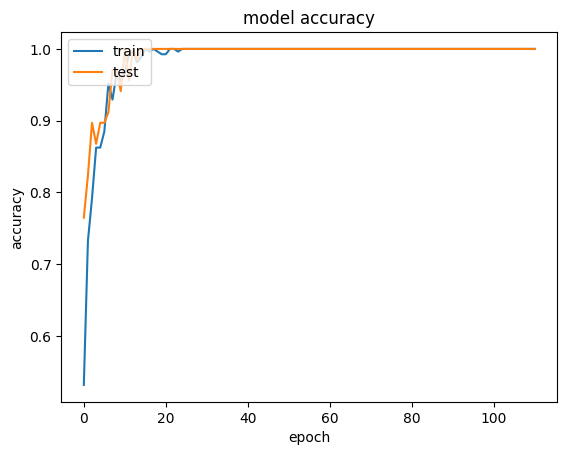

3/3 [==============================] - 0s 6ms/step


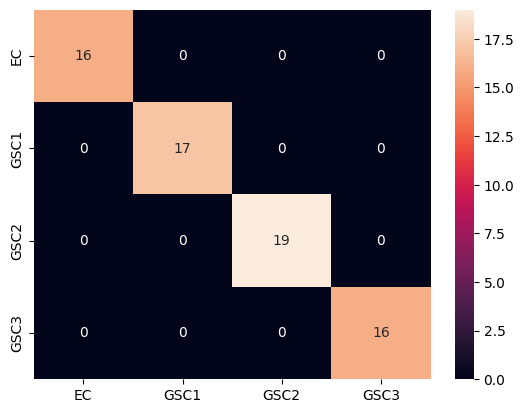

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        16

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [ ]:
# Neural network
input_tensor = Input(shape=(728, 1))

x = layers.Conv1D(128, 10, 3, activation='LeakyReLU')(input_tensor)
x = layers.MaxPooling1D(pool_size = 2, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization(momentum=0.80, epsilon=0.001) (x)
x = layers.Flatten()(x)
x = Dense(512, activation='relu')(x)
out = Dense(4, activation='softmax')(x)
cnn_model = keras.Model(inputs=[input_tensor], outputs=[out])
opt = Adam(learning_rate=1E-4, use_ema=True, ema_momentum=0.99)

cnn_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


history = cnn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 50,
                        callbacks=[es])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix
y_pred = cnn_model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))
DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['EC', 'GSC1', 'GSC2', 'GSC3'], xticklabels=['EC', 'GSC1', 'GSC2', 'GSC3'])
plt.show()

print(classification_report(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1))))

##CNN Explainability

In [ ]:
def grad_cam(layer_name, data):
    grad_model = tf.keras.models.Model([cnn_model.inputs], [cnn_model.get_layer(layer_name).output, cnn_model.output])
    last_conv_layer_output, preds = grad_model(data)

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(data)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0))

    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output * pooled_grads
    heatmap = tf.reduce_mean(heatmap, axis=(1))
    heatmap = np.expand_dims(heatmap,0)
    return heatmap

#Generating visualizations for test set and appending to heatmap

X = train_df.drop('outcome', axis = 1)
y = train_df['outcome']

layer_name = "conv1d_2"
label = [0, 1, 2, 3]
heatmap_list = []
heatmaps_dict = {}
i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
    data = np.expand_dims(i,0)
    heatmap = grad_cam(layer_name, data)
    heatmap_list.append(heatmap)
    #Create dictionary per class
    if clas in heatmaps_dict.keys():
      heatmaps_dict[clas].append(heatmap)
    else:
      heatmaps_dict[clas] = [heatmap]
    if clas in i_dict.keys():
      i_dict[clas].append(i)
    else:
      i_dict[clas] = [i]

In [ ]:
#Create average heatmap per class
#Average per class]
wave = X.columns
w_names = [float(x) for x in wave[:-1]]
average_heatmap = {}
for key, value in heatmaps_dict.items():
  average_heatmap[key] = np.mean(heatmaps_dict[key], axis=0)


total_av = np.mean(list(average_heatmap.values()), axis=0)
average_heatmap['total'] = total_av

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728

#Create dict for current scale values and corresponding Wavelengths
x_axis_dict = { k:v for (k,v) in zip((range(0,728)), list(X.columns))}

#Save total as csv for use in feature selection
heat = pd.DataFrame()
heat['EC'] = [x for x in average_heatmap['EC']][0]
heat['CSG1'] = [x for x in average_heatmap['CSG1']][0]
heat['CSG2'] = [x for x in average_heatmap['CSG2']][0]
heat['CSG3'] = [x for x in average_heatmap['CSG3']][0]
heat['total'] = [x for x in average_heatmap['total']][0]

heat.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/CNN_heatmaps.csv')

heat['total'].to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/total_CNN_heatmaps.csv')

-1102.801131067568
2868.130058918918
-1556.692212546875
13101.112701562499
-698.2660913609376
5625.645611531249
-1026.6384228656714
5884.114633283581
-1083.6265062593156
6869.750751324062


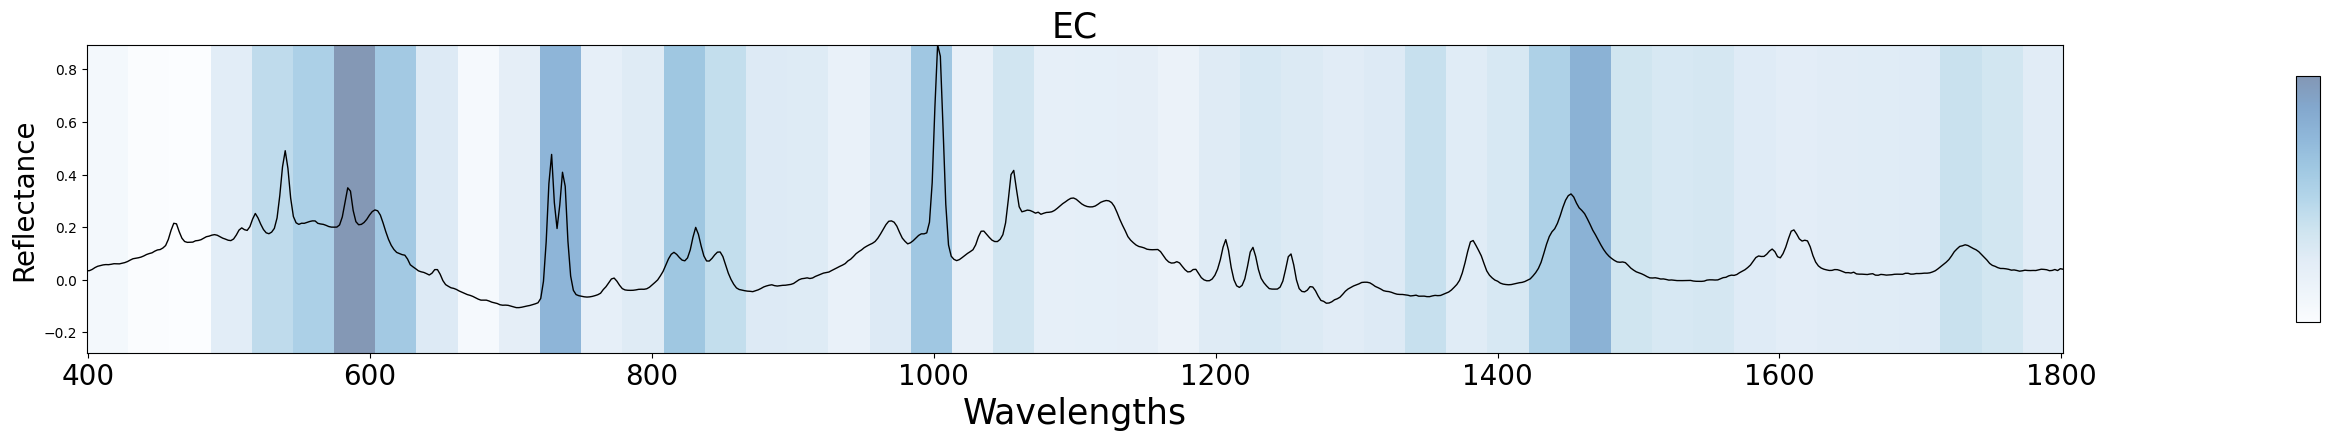

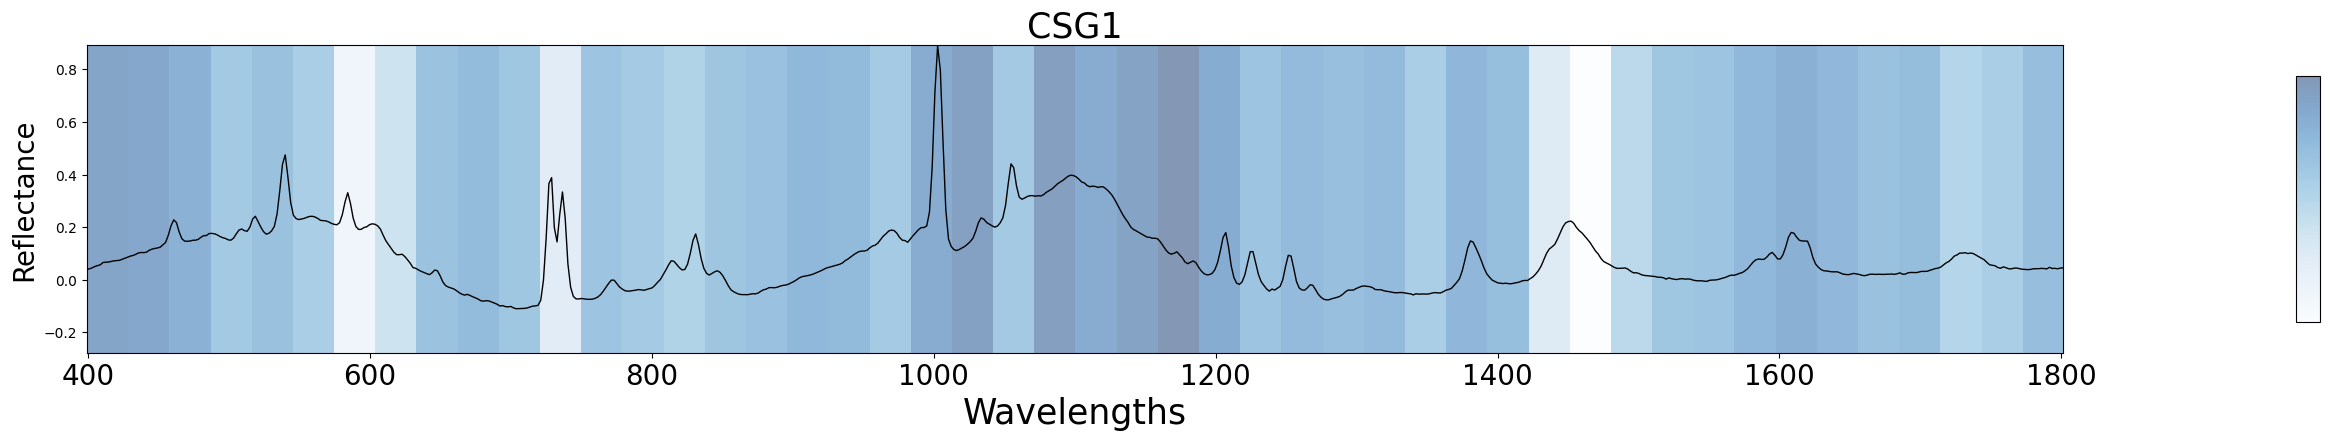

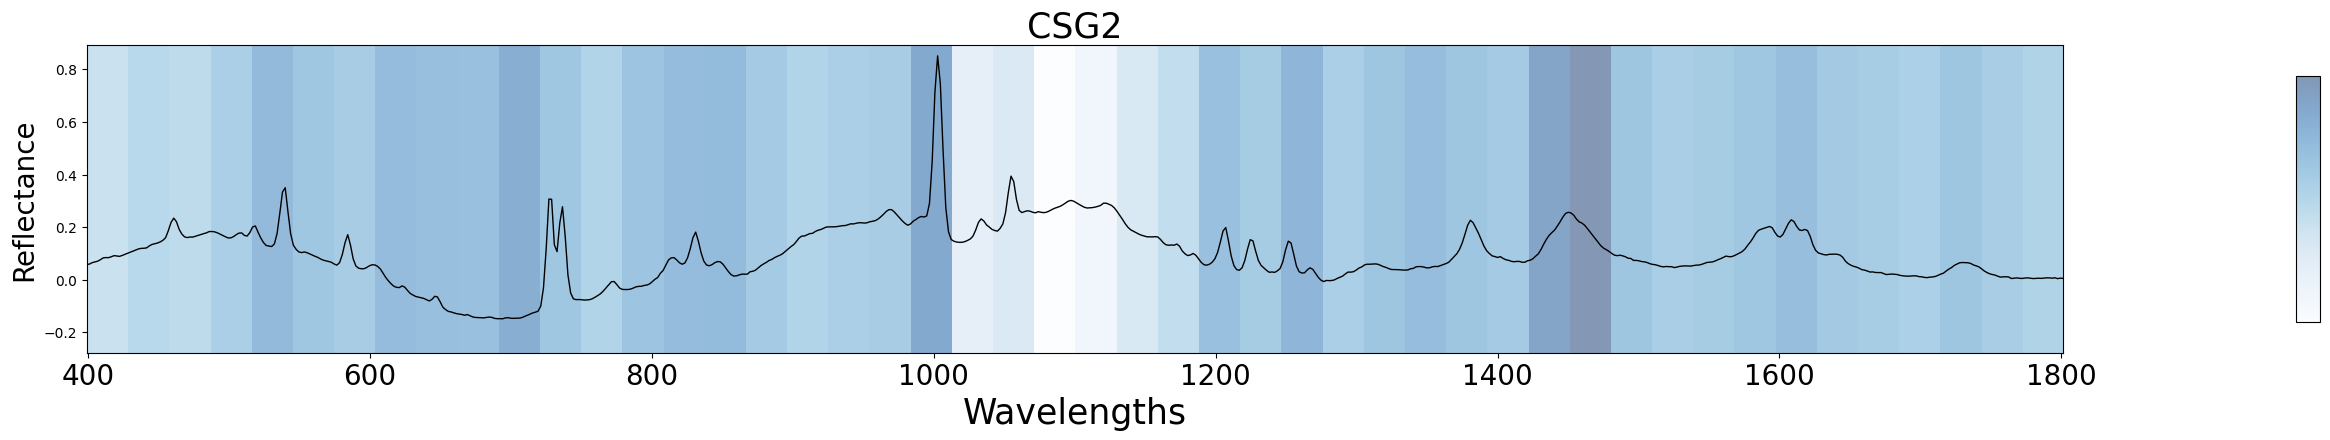

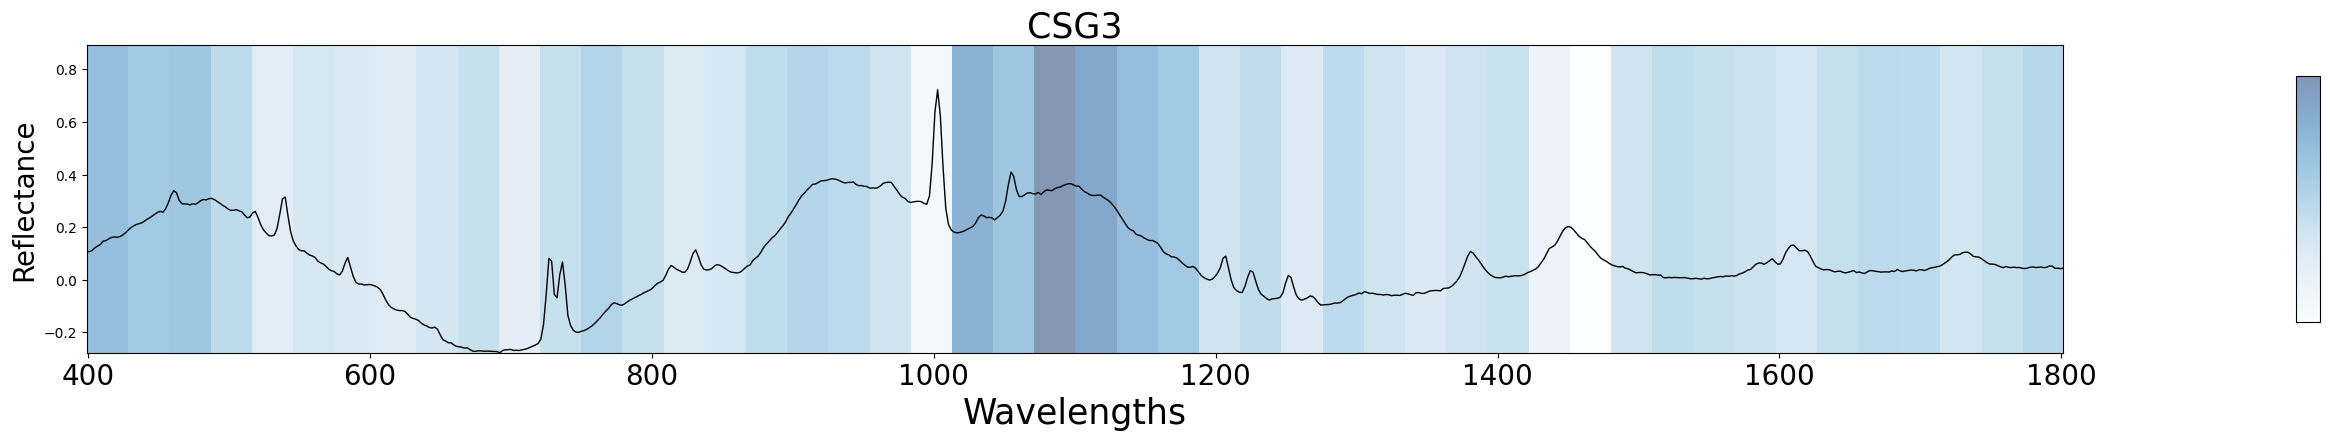

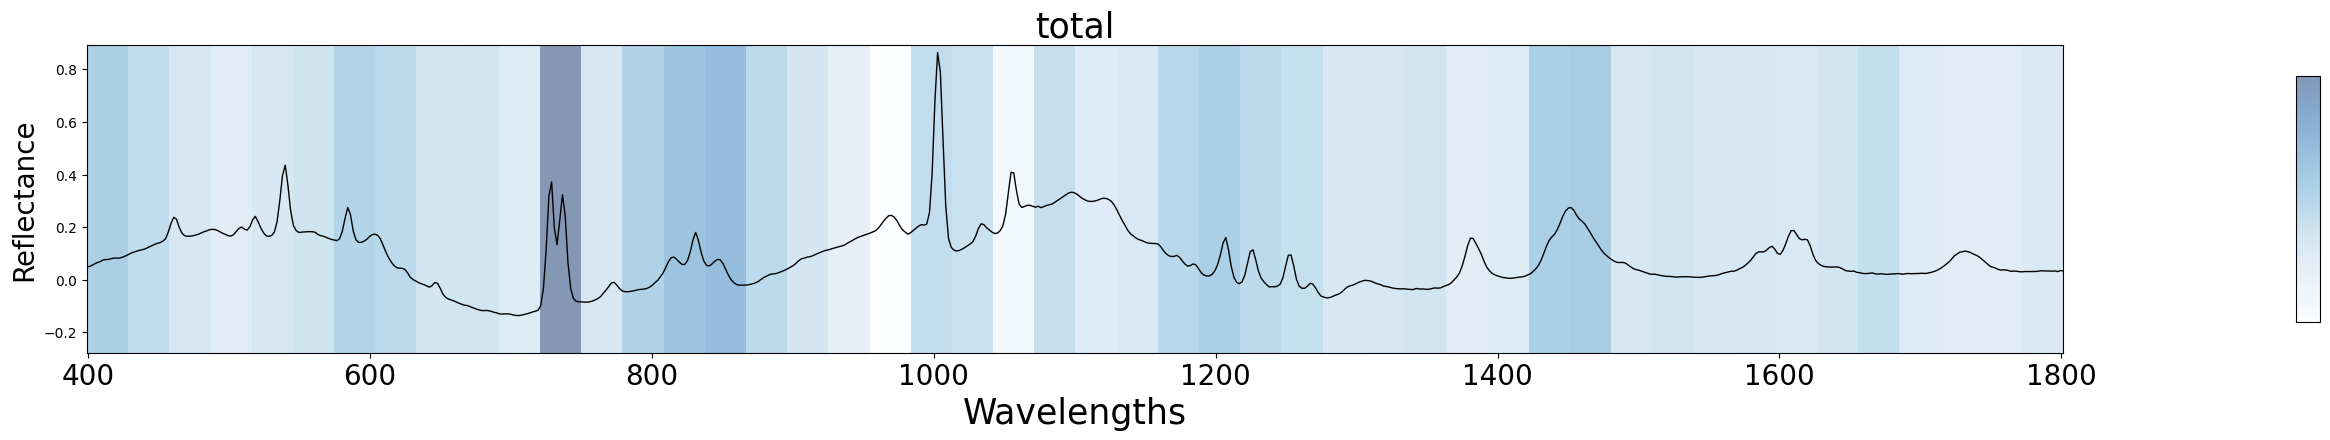

In [ ]:
f = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/CNN_heatmaps.csv', index_col = 0)

average_heatmap = f.to_dict(orient = 'list')
wave = X.columns
w_names = [float(x) for x in wave]

X_test_vis = train_df.drop(['outcome'], axis = 1)
y_test_vis = train_df['outcome']

i_dict = {}
X_ar = np.array(X_test_vis)
for clas, i in zip(y_test_vis, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728

scaled_average_i = {}
for key, value in average_i.items():
  mi = min(value)
  print(mi)
  ma = max(value)
  print(ma)
  di = ma - mi
  scaled_average_i[key] = [x/di for x in value]

def plot_ax(ax, signal, sampling_rate, plot_grid=True):
    color_line = (0, 0, 0.7)
    color_major = (1, 0, 0)
    color_minor = (1, 0.7, 0.7)

    ax.plot(np.arange(0, len(signal)), signal, linewidth=0.5, color=color_line)

    if plot_grid:
        # set major grid
        xmajor = np.arange(0, len(signal), sampling_rate * 0.2)
        ymajor = np.arange(signal.min(), signal.max(), 0.5)
        ax.set_xticks(xmajor, minor=False)
        ax.set_xticks(xmajor, minor=False)
        ax.set_yticks(ymajor, minor=False)
        ax.grid(which="major", color=color_major, linewidth=0.5)

        # set minor grid
        xminor = np.arange(0, len(signal), sampling_rate * 0.04)
        yminor = np.arange(signal.min(), signal.max(), 0.1)
        ax.set_xticks(xminor, minor=True)
        ax.set_yticks(yminor, minor=True)
        ax.grid(which="minor", color=color_minor, linewidth=0.5)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.margins(0)

    ax.set_ylim(signal.min(), signal.max())

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in average_heatmap.items():
    mapped = [value[x:x+5] for x in range(0, len(value), 5)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 48))
    binned_heatmapdict[key] = mapped_mean

#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=2),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, scaled_average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

##Feature Selection

In [ ]:
h = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/total_CNN_heatmaps.csv', index_col = 0)
m = []

for index, row in h.iterrows():
  m.append(row[0])

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 80th percentile or above
per = np.percentile(m, 80)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = round(train_df.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']
feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_train_95 = X_sel_train
X_train_95['outcome'] = train_df['outcome']

X_train_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_CNN_80.csv')


X_test_95 = X_sel_test
X_test_95['outcome'] = test_df['outcome']

X_test_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_CNN_80.csv')

<ipython-input-13-22775c96905d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-13-22775c96905d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 85th percentile or above
per = np.percentile(m, 85)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = round(train_df.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue


feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']
feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_train_95 = X_sel_train
X_train_95['outcome'] = train_df['outcome']

X_train_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_CNN_85.csv')


X_test_95 = X_sel_test
X_test_95['outcome'] = test_df['outcome']

X_test_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_CNN_85.csv')

<ipython-input-14-01f0155e1cf7>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-14-01f0155e1cf7>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 90th percentile or above
per = np.percentile(m, 90)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = round(train_df.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue


feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']
feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_train_95 = X_sel_train
X_train_95['outcome'] = train_df['outcome']

X_train_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_CNN_90.csv')


X_test_95 = X_sel_test
X_test_95['outcome'] = test_df['outcome']

X_test_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_CNN_90.csv')

<ipython-input-15-d38bc2bad453>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-15-d38bc2bad453>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 95th percentile or above
per = np.percentile(m, 95)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = round(train_df.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue


feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']
feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_train_95 = X_sel_train
X_train_95['outcome'] = train_df['outcome']

X_train_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_CNN_95.csv')


X_test_95 = X_sel_test
X_test_95['outcome'] = test_df['outcome']

X_test_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_CNN_95.csv')

<ipython-input-16-bdf5b91d9a7f>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-16-bdf5b91d9a7f>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 99th percentile or above
per = np.percentile(m, 99)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = round(train_df.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']
feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_train_95 = X_sel_train
X_train_95['outcome'] = train_df['outcome']

X_train_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_CNN_99.csv')


X_test_95 = X_sel_test
X_test_95['outcome'] = test_df['outcome']

X_test_95.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_CNN_99.csv')

<ipython-input-17-f67e14213792>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-17-f67e14213792>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


#Transformer

##Implement Transformer

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
train_df = train_df.replace({"outcome": dic})
test_df = test_df.replace({"outcome": dic})

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Label-encode y
le = preprocessing.LabelEncoder()
y_train_enc = le.fit_transform(y_train)
#One-hot encoding
y_train_list = []
for item in y_train_enc:
  zer = np.zeros(4)
  zer[item] = 1
  y_train_list.append(zer)

y_train = np.array(y_train_list)

#Label-encode y
y_test_enc = le.fit_transform(y_test)
#One-hot encoding
y_test_list = []
for item in y_test_enc:
  zer = np.zeros(4)
  zer[item] = 1
  y_test_list.append(zer)

y_test = np.array(y_test_list)

X_train = np.array(X_train)
X_train_3D = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

X_test = np.array(X_test)
X_test_3D = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
class ViTEmbeddings(tf.keras.layers.Layer):
    def __init__(self, patch_size, hidden_size, dropout=0.0, **kwargs):
        super().__init__(**kwargs)

        self.patch_size = patch_size
        self.hidden_size = hidden_size

        self.patch_embeddings = tf.keras.layers.Conv1D(filters=hidden_size, kernel_size=patch_size, strides=patch_size)
        self.dropout = tf.keras.layers.Dropout(rate=dropout)

    def build(self, input_shape):
        self.cls_token = self.add_weight(shape=(1, 1, self.hidden_size), trainable=True, name="cls_token")

        num_patches = input_shape[1] // self.patch_size
        self.position_embeddings = self.add_weight(
            shape=(1, num_patches + 1, self.hidden_size), trainable=True, name="position_embeddings"
        )

    def call(self, inputs: tf.Tensor, training: bool = False) -> tf.Tensor:
        inputs_shape = tf.shape(inputs)  # N,H,W,C
        embeddings = self.patch_embeddings(inputs, training=training)

        # add the [CLS] token to the embedded patch tokens
        cls_tokens = tf.repeat(self.cls_token, repeats=inputs_shape[0], axis=0)
        embeddings = tf.concat((cls_tokens, embeddings), axis=1)

        # add positional encoding to each token
        embeddings = embeddings + self.position_embeddings
        embeddings = self.dropout(embeddings, training=training)

        return embeddings
#Next is the MLP; nothing special here. It is the same as in the vit paper.

class MLP(tf.keras.layers.Layer):
    def __init__(self, mlp_dim, out_dim=None, activation="gelu", dropout=0.0, **kwargs):
        super().__init__(**kwargs)
        self.mlp_dim = mlp_dim
        self.out_dim = out_dim
        self.activation = activation
        self.dropout_rate = dropout

    def build(self, input_shape):
        self.dense1 = tf.keras.layers.Dense(self.mlp_dim)
        self.activation1 = tf.keras.layers.Activation(self.activation)
        self.dropout = tf.keras.layers.Dropout(self.dropout_rate)
        self.dense2 = tf.keras.layers.Dense(input_shape[-1] if self.out_dim is None else self.out_dim)

    def call(self, inputs: tf.Tensor, training: bool = False):
        x = self.dense1(inputs)
        x = self.activation1(x)
        x = self.dropout(x, training=training)
        x = self.dense2(x)
        x = self.dropout(x, training=training)
        return x

class Block(tf.keras.layers.Layer):
    def __init__(
        self,
        num_heads,
        attention_dim,
        attention_bias,
        mlp_dim,
        attention_dropout=0.0,
        sd_survival_probability=1.0,
        activation="gelu",
        dropout=0.0,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.norm_before = tf.keras.layers.LayerNormalization()
        self.attn = tf.keras.layers.MultiHeadAttention(
            num_heads,
            attention_dim // num_heads,
            use_bias=attention_bias,
            dropout=attention_dropout,
        )
        self.stochastic_depth = tfa.layers.StochasticDepth(sd_survival_probability)
        self.norm_after = tf.keras.layers.LayerNormalization()
        self.mlp = MLP(mlp_dim=mlp_dim, activation=activation, dropout=dropout)

    def build(self, input_shape):
        super().build(input_shape)
        # TODO YONIGO: tf doc says to do this  ¯\_(ツ)_/¯
        self.attn._build_from_signature(input_shape, input_shape)

    def call(self, inputs, training=False):
        x = self.norm_before(inputs, training=training)
        x = self.attn(x, x, training=training)
        x = self.stochastic_depth([inputs, x], training=training)
        x2 = self.norm_after(x, training=training)
        x2 = self.mlp(x2, training=training)
        return self.stochastic_depth([x, x2], training=training)

    def get_attention_scores(self, inputs):
        x = self.norm_before(inputs, training=False)
        _, weights = self.attn(x, x, training=False, return_attention_scores=True)
        return weights


class VisionTransformer(tf.keras.Model):
    def __init__(
        self,
        patch_size,
        hidden_size,
        depth,
        num_heads,
        mlp_dim,
        num_classes,
        dropout=0.1,
        sd_survival_probability=1.0,
        attention_bias=False,
        attention_dropout=0.0,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.embeddings = ViTEmbeddings(patch_size, hidden_size, dropout)
        sd = tf.linspace(1.0, sd_survival_probability, depth)
        self.blocks = [
            Block(
                num_heads,
                attention_dim=hidden_size,
                attention_bias=attention_bias,
                attention_dropout=attention_dropout,
                mlp_dim=mlp_dim,
                sd_survival_probability=(sd[i].numpy().item()),
                dropout=dropout,
            )
            for i in range(depth)
        ]

        self.norm = tf.keras.layers.LayerNormalization()

        self.head = tf.keras.layers.Dense(num_classes, activation = 'softmax')

    def call(self, inputs: tf.Tensor, training: bool = False) -> tf.Tensor:
        x = self.embeddings(inputs, training=training)
        for block in self.blocks:
            x = block(x, training=training)
        x = self.norm(x)
        x = x[:, 0]  # take only cls_token
        return self.head(x)

    def get_last_selfattention(self, inputs: tf.Tensor):
        x = self.embeddings(inputs, training=False)
        for block in self.blocks[:-1]:
            x = block(x, training=False)
        return self.blocks[-1].get_attention_scores(x)


import matplotlib.pyplot as plt
import numpy as np

lead_index = ['Class']


def plot_12(ecg, sampling_rate, plot_grid=True):
    "This function is ridiculously slow and there are mutch better ways to implemt"
    figsize = (25, 1.5 * 10)

    height_ratios = [ecg[:, i].max() - ecg[:, i].min() for i in range(12)]
    height_ratios = [i / height_ratios[0] for i in height_ratios]
    fig, axs = plt.subplots(12, 1, figsize=figsize, gridspec_kw={"height_ratios": height_ratios})
    fig.subplots_adjust(hspace=0.0)
    for i, ax in enumerate(axs):
        plot_ax(ax, ecg[:, i], sampling_rate, plot_grid=plot_grid)
        ax.set_ylabel(lead_index[i], fontsize=13)

    return fig, axs


def plot_ax(ax, signal, sampling_rate, plot_grid=True):
    color_line = (0, 0, 0.7)
    color_major = (1, 0, 0)
    color_minor = (1, 0.7, 0.7)

    ax.plot(np.arange(0, len(signal)), signal, linewidth=0.5, color=color_line)

    if plot_grid:
        # set major grid
        xmajor = np.arange(0, len(signal), sampling_rate * 0.2)
        ymajor = np.arange(signal.min(), signal.max(), 0.5)
        ax.set_xticks(xmajor, minor=False)
        ax.set_xticks(xmajor, minor=False)
        ax.set_yticks(ymajor, minor=False)
        ax.grid(which="major", color=color_major, linewidth=0.5)

        # set minor grid
        xminor = np.arange(0, len(signal), sampling_rate * 0.04)
        yminor = np.arange(signal.min(), signal.max(), 0.1)
        ax.set_xticks(xminor, minor=True)
        ax.set_yticks(yminor, minor=True)
        ax.grid(which="minor", color=color_minor, linewidth=0.5)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.margins(0)

    ax.set_ylim(signal.min(), signal.max())

In [ ]:
#Best Model so far
vit1 = VisionTransformer(
        patch_size=15,
        hidden_size=64,
        depth=3,
        num_heads=3,
        mlp_dim=64,
        num_classes=4,
        sd_survival_probability=1.0,
    )

optimizer = tf.keras.optimizers.Adam(0.0001, use_ema = True, ema_momentum = 0.99)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = [tf.keras.metrics.Accuracy()]
vit1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

#cbs = [tf.keras.callbacks.ModelCheckpoint("vit_best/", monitor="val_roc_auc", save_best_only=True, save_weights_only=True)]

es = EarlyStopping(monitor= 'val_loss', mode='min', verbose=1, patience = 50)

history_transformer = vit1.fit(X_train_3D, y_train, validation_data = (X_test_3D, y_test), epochs=1000, callbacks = [es])

Epoch 1/1000
9/9 [==============================] - 16s 211ms/step - loss: 1.8323 - accuracy: 0.0000e+00 - val_loss: 1.5379 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 58ms/step - loss: 1.6013 - accuracy: 0.0000e+00 - val_loss: 1.4289 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 37ms/step - loss: 1.5096 - accuracy: 0.0000e+00 - val_loss: 1.3545 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 33ms/step - loss: 1.5219 - accuracy: 0.0000e+00 - val_loss: 1.3419 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 1s 68ms/step - loss: 1.4595 - accuracy: 0.0000e+00 - val_loss: 1.3231 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 1s 79ms/step - loss: 1.4484 - accuracy: 0.0000e+00 - val_loss: 1.3129 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 55ms/step - loss: 1.4531 - accuracy: 0.0000e+00 -

3/3 [==============================] - 1s 9ms/step
0.9411764705882353
tf.Tensor(0.9481233677034353, shape=(), dtype=float64)


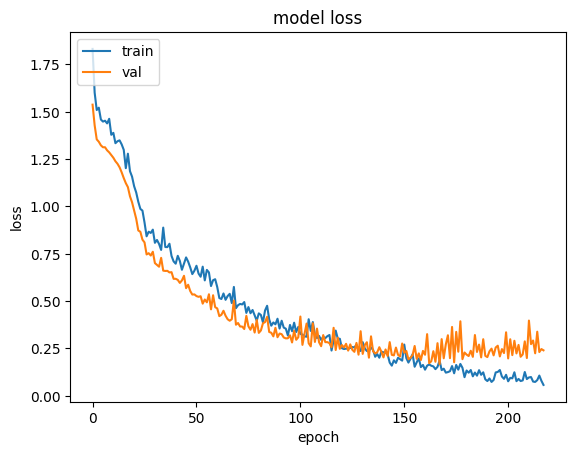

3/3 [==============================] - 0s 12ms/step


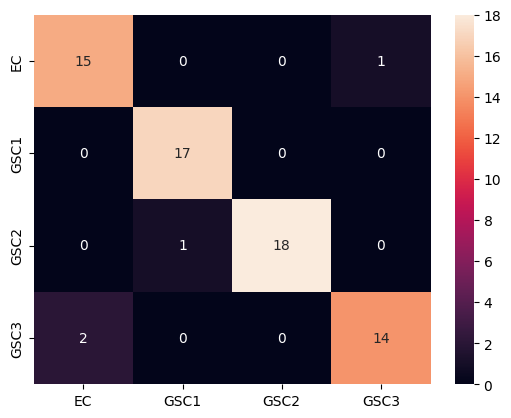

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.94      1.00      0.97        17
           2       1.00      0.95      0.97        19
           3       0.93      0.88      0.90        16

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68



In [ ]:
pred = vit1.predict(X_test_3D)
preds_conv = []
for item in pred:
  max_ind = list(item).index(max(item))
  zer = np.zeros(4)
  zer[max_ind] = 1
  preds_conv.append(zer)
print(accuracy_score(y_test, preds_conv))
print(loss(y_test, preds_conv))

plt.plot(history_transformer.history['loss'])
plt.plot(history_transformer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix
y_pred = vit1.predict(X_test_3D)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))
DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['EC', 'GSC1', 'GSC2', 'GSC3'], xticklabels=['EC', 'GSC1', 'GSC2', 'GSC3'])
plt.show()

print(classification_report(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1))))

##Explainability

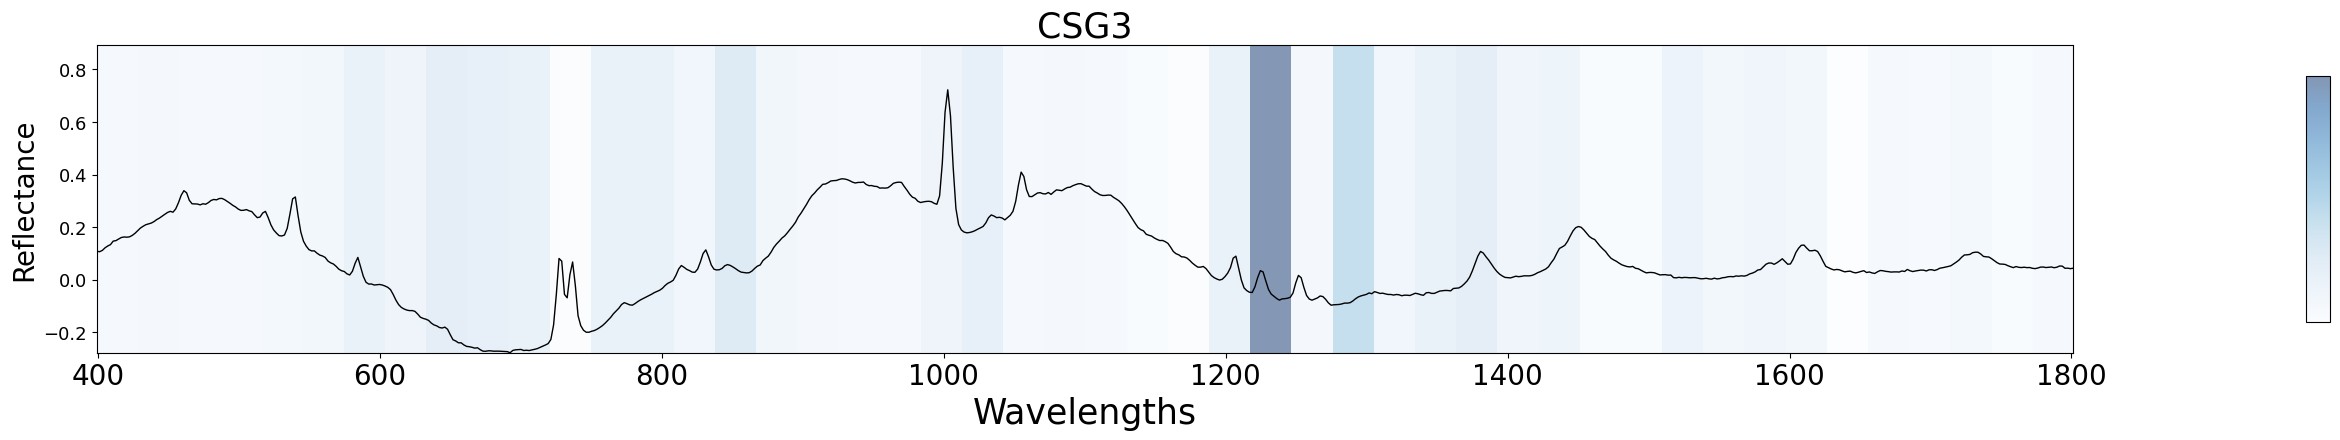

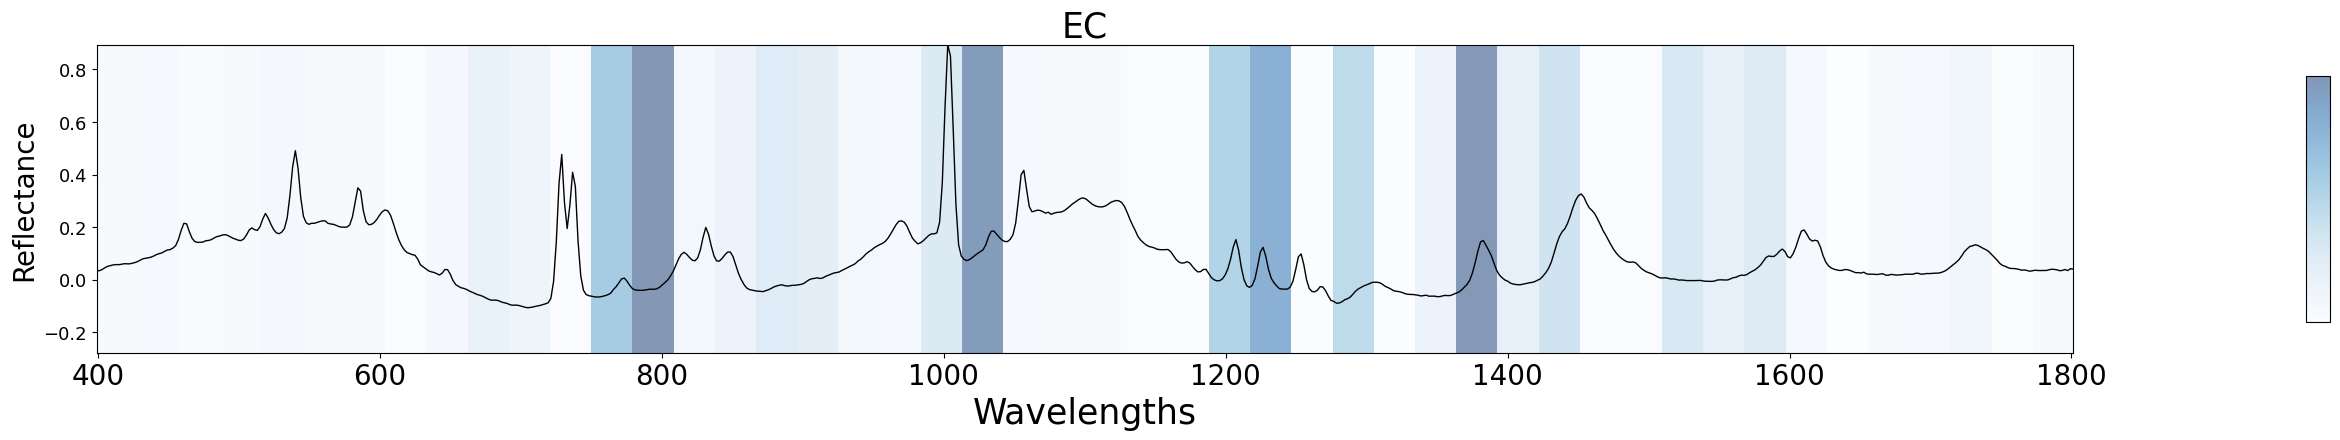

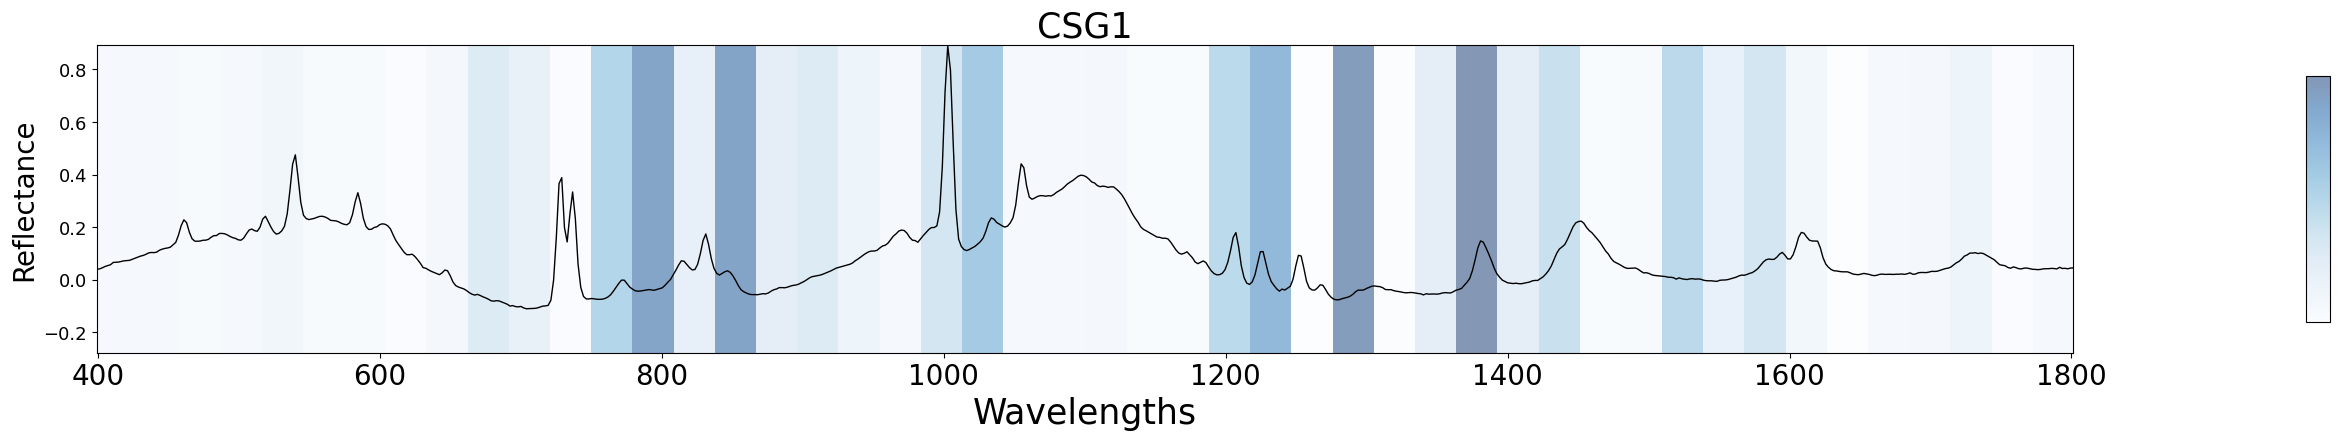

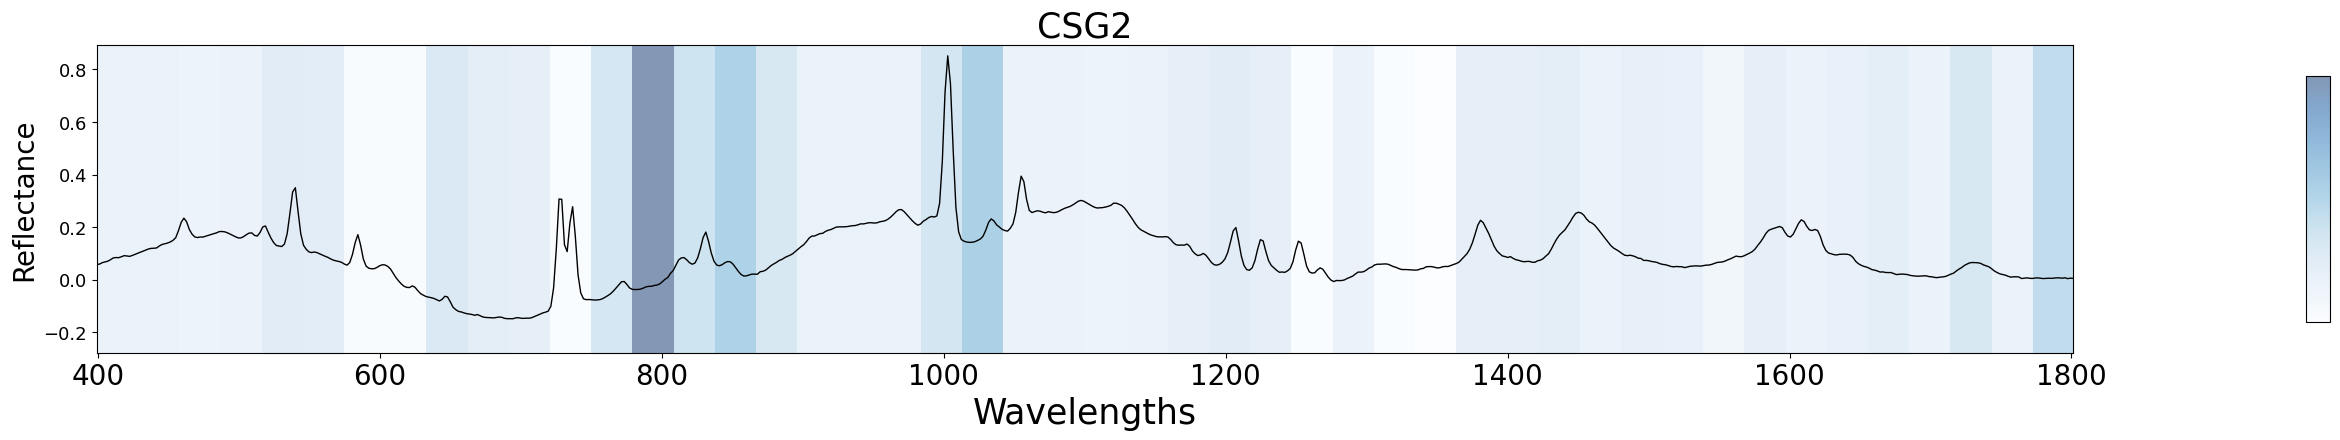

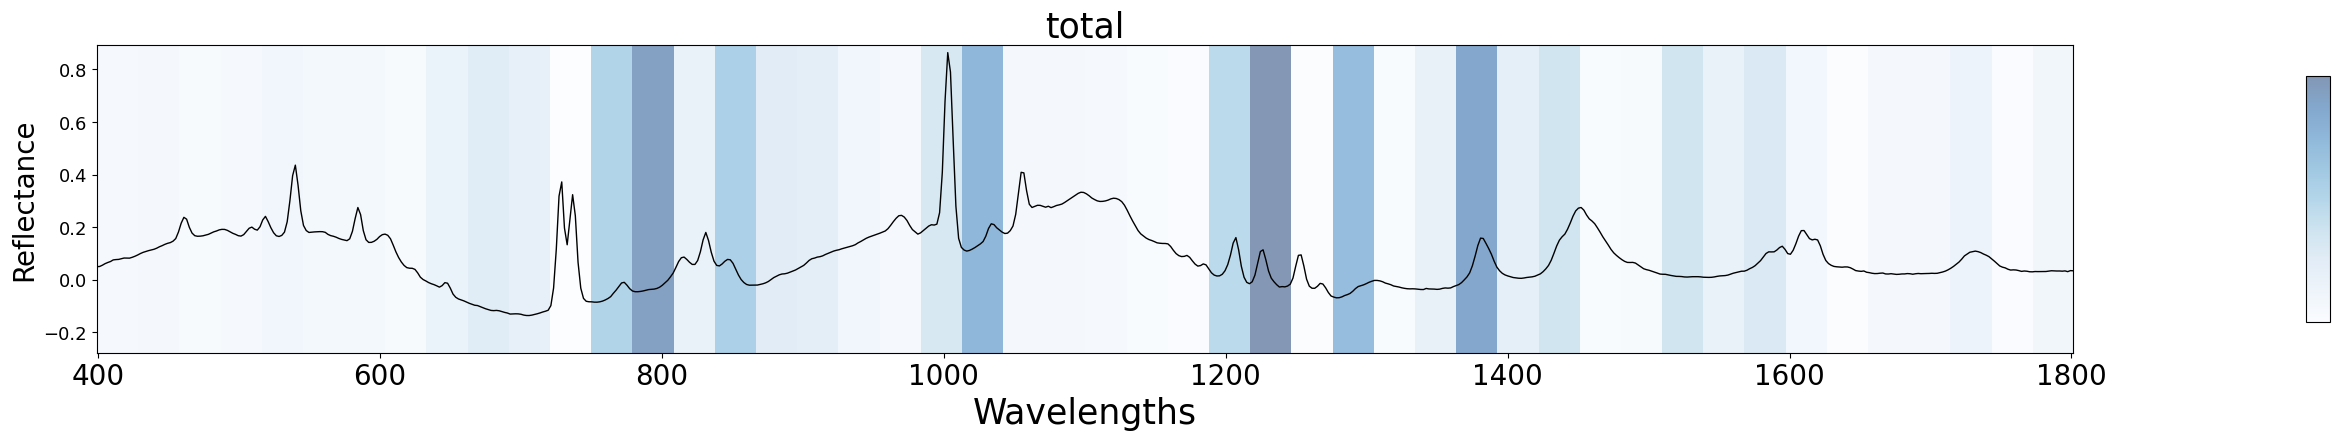

In [ ]:
def array_to_label(y):
  array_to_value = [y.tolist().index(1)]
  value_to_label = le.inverse_transform(np.array(array_to_value))
  return value_to_label[0]

fusion_method = 'max'
aggregated_dict = {}
aggregated_record = {}
for record, label in zip(X_train_3D, y_train):
  attn = vit1.get_last_selfattention(tf.expand_dims(record, 0))
  attn = attn[0, :, 0, 1:]  # cls_token attention with rest
  attn = tf.transpose(attn, (1, 0))
  attn = tf.expand_dims(tf.expand_dims(attn, 0), 0)
  attn = tf.image.resize(attn, (1, 48))[0, 0]

  #Fusing attention
  if fusion_method == "mean":
      attention_heads_fused = np.array(attn).mean(axis=1)
  elif fusion_method == "max":
      attention_heads_fused = np.array(attn).max(axis=1)
  elif fusion_method == "min":
      attention_heads_fused = np.array(attn).min(axis=1)

  true_class = array_to_label(label)
  if true_class in aggregated_dict.keys():
    aggregated_dict[true_class].append(attention_heads_fused)
  else:
    aggregated_dict[true_class] = [attention_heads_fused]

  if true_class in aggregated_record.keys():
    aggregated_record[true_class].append(record)
  else:
    aggregated_record[true_class] = [record]

average_heatmap = {}
average_record = {}

for key, value in aggregated_dict.items():
  av = np.mean(aggregated_dict[key], axis = 0)
  average_heatmap[key] = av

for key, value in aggregated_record.items():
  av = np.mean(aggregated_record[key], axis = 0)
  average_record[key] = av

def plot_ax(ax, signal, sampling_rate, plot_grid=True):
    color_line = (0, 0, 0.7)
    color_major = (1, 0, 0)
    color_minor = (1, 0.7, 0.7)

    ax.plot(np.arange(0, len(signal)), signal, linewidth=0.5, color=color_line)

    if plot_grid:
        # set major grid
        xmajor = np.arange(0, len(signal), sampling_rate * 0.2)
        ymajor = np.arange(signal.min(), signal.max(), 0.5)
        ax.set_xticks(xmajor, minor=False)
        ax.set_xticks(xmajor, minor=False)
        ax.set_yticks(ymajor, minor=False)
        ax.grid(which="major", color=color_major, linewidth=0.5)

        # set minor grid
        xminor = np.arange(0, len(signal), sampling_rate * 0.04)
        yminor = np.arange(signal.min(), signal.max(), 0.1)
        ax.set_xticks(xminor, minor=True)
        ax.set_yticks(yminor, minor=True)
        ax.grid(which="minor", color=color_minor, linewidth=0.5)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.margins(0)

    ax.set_ylim(signal.min(), signal.max())

total_av = np.mean(list(average_heatmap.values()), axis=0)
average_heatmap['total'] = total_av

total_i = np.mean(np.array(list(average_record.values())), axis = 0)
average_record['total'] = total_i

#Gettiing Average Heatmaps
#Setting lower and upper bounds for signal intensity

wave = train_df.columns
w_names = [float(x) for x in wave[:-1]]

X = train_df.drop('outcome', axis = 1)
y = train_df['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728

scaled_average_i = {}
for key, value in average_i.items():
  mi = min(value)
  ma = max(value)
  di = ma - mi
  scaled_average_i[key] = [x / di for x in value]

cmax = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue
cmin = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

gmax = 0
for key, value in average_heatmap.items():
  f = [x for x in value]
  i = max(f)
  if i > gmax:
    gmax = i
  else:
    continue
gmin = 0
for key, value in average_heatmap.items():
  f = [x for x in value]
  i = min(f)
  if i < gmin:
    gmin = i
  else:
    continue

for key, value in zip(average_heatmap.keys(), average_heatmap.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=0),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, scaled_average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  plt.tick_params(axis='y', labelsize=13)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  #cbar.set_label('Gradient Usage', fontsize=12)
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

#Need to save average heatmap here
import pandas as pd
df = pd.DataFrame(average_heatmap)
df.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_average_heatmap_transformer.csv')

##Feature Selection

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

In [ ]:
h = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_average_heatmap_transformer.csv')
m = [x for x in h['total']]


train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 80th percentile or above
per = np.percentile(m, 80)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = 14
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']
feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_Transformer_80.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_Transformer_80.csv')

<ipython-input-31-59ce275d2bed>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-31-59ce275d2bed>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


In [ ]:
h = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_average_heatmap_transformer.csv')
m = [x for x in h['total']]


train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 85th percentile or above
per = np.percentile(m, 85)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = 14
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']
feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_Transformer_85.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_Transformer_85.csv')

<ipython-input-32-798944acace5>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-32-798944acace5>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


In [ ]:
h = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_average_heatmap_transformer.csv', index_col = 0)
m = [x for x in h['total']]


train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 90th percentile or above
per = np.percentile(m, 90)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = 14
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']

feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test


X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_Transformer_90.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_Transformer_90.csv')

<ipython-input-33-f4c253d28512>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-33-f4c253d28512>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


In [ ]:
h = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_average_heatmap_transformer.csv')
m = [x for x in h['total']]


train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
train_df = train_df.replace({"outcome": dic})
test_df = test_df.replace({"outcome": dic})

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 95th percentile or above
per = np.percentile(m, 95)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = 14
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue
feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']

feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_Transformer_95.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_Transformer_95.csv')

<ipython-input-34-2d4a72f40e8e>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-34-2d4a72f40e8e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


In [ ]:
def array_to_label(y):
  array_to_value = [y.tolist().index(1)]
  value_to_label = le.inverse_transform(np.array(array_to_value))
  return value_to_label[0]

fusion_method = 'max'
aggregated_dict = {}
aggregated_record = {}
for record, label in zip(X_test_3D, y_test):
  attn = vit85.get_last_selfattention(tf.expand_dims(record, 0))
  attn = attn[0, :, 0, 1:]  # cls_token attention with rest
  attn = tf.transpose(attn, (1, 0))
  attn = tf.expand_dims(tf.expand_dims(attn, 0), 0)
  attn = tf.image.resize(attn, (1, 53))[0, 0]
  #Fusing attention
  if fusion_method == "mean":
      attention_heads_fused = np.array(attn).mean(axis=1)
  elif fusion_method == "max":
      attention_heads_fused = np.array(attn).max(axis=1)
  elif fusion_method == "min":
      attention_heads_fused = np.array(attn).min(axis=1)

  true_class = array_to_label(label)
  if true_class in aggregated_dict.keys():
    aggregated_dict[true_class].append(attention_heads_fused)
  else:
    aggregated_dict[true_class] = [attention_heads_fused]

  if true_class in aggregated_record.keys():
    aggregated_record[true_class].append(record)
  else:
    aggregated_record[true_class] = [record]

In [ ]:
#Get heatmap for example instanc3
ins_EC = aggregated_dict['EC'][0]
ins_CSG1 = aggregated_dict['CSG1'][0]
ins_CSG2 = aggregated_dict['CSG2'][0]
ins_CSG3 = aggregated_dict['CSG3'][0]

instance_heatmap = {}
instance_heatmap['EC'] = ins_EC
instance_heatmap['CSG1'] = ins_CSG1
instance_heatmap['CSG2'] = ins_CSG2
instance_heatmap['CSG3'] = ins_CSG3

ins = pd.DataFrame(instance_heatmap)

ins.to_csv('Transformer_Instance_Heatmap_95_Italian.csv')

In [ ]:
df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)
df_curv = df_curve.drop('outcome', axis = 1)
X_train = train_df.drop('outcome', axis = 1)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
df_curv = df_curv.replace({"outcome": dic})

fin_heat = {}

full_df_col = [x for x in df_curve.columns]
feat_sel_col = [x for x in X_sel_train.columns]

for key, value in ins.items():
  kv = {}
  for val, col in zip(value, feat_sel_col):
    kv[col] = val
  fin_heat[key] = kv

fin = {}
for key, value in fin_heat.items():
  f = []
  for x in full_df_col:
    if x in value.keys():
      f.append(value[x])
      f.append(value[x])
    else:
      f.append(0)
  fin[key] = f

In [ ]:
df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)
dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
df_curve = df_curve.replace({"outcome": dic})

In [ ]:
X = df_curve.drop('outcome', axis = 1)
y = df_curve['outcome']

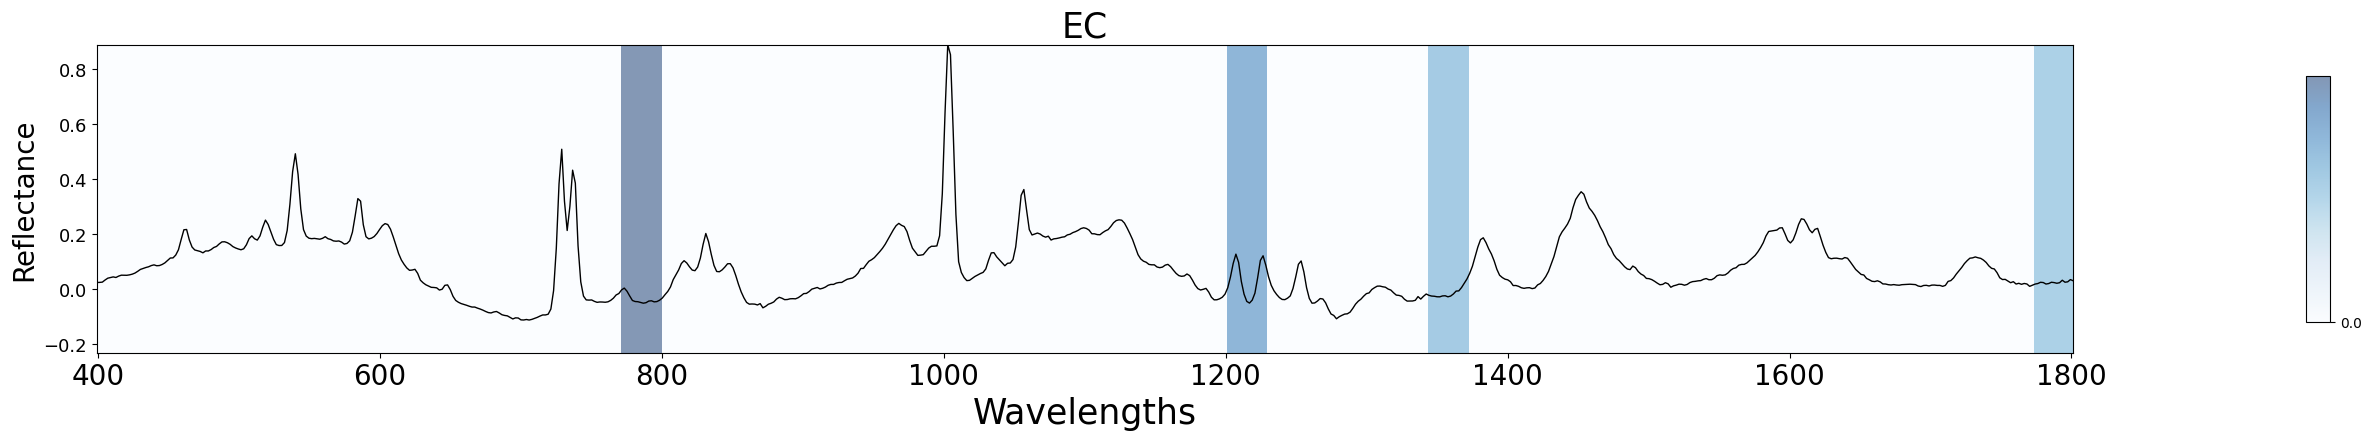

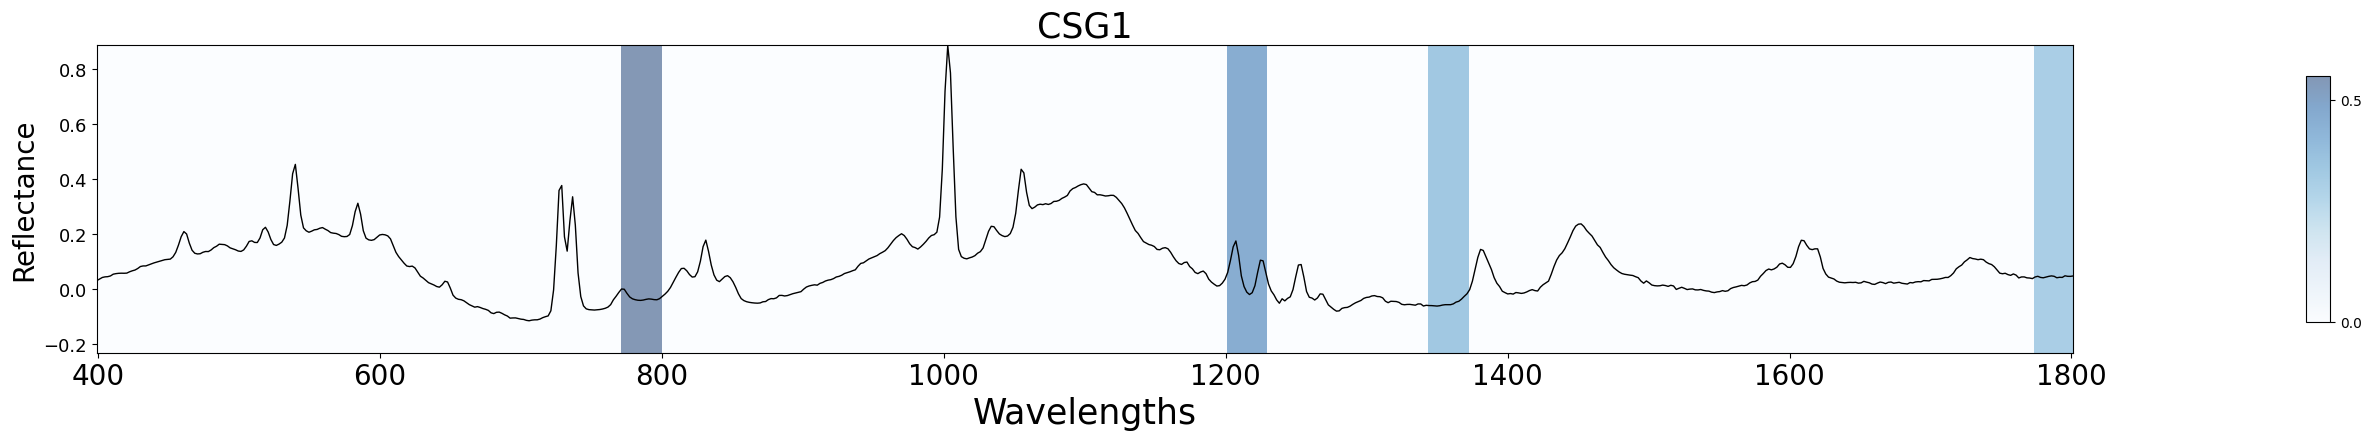

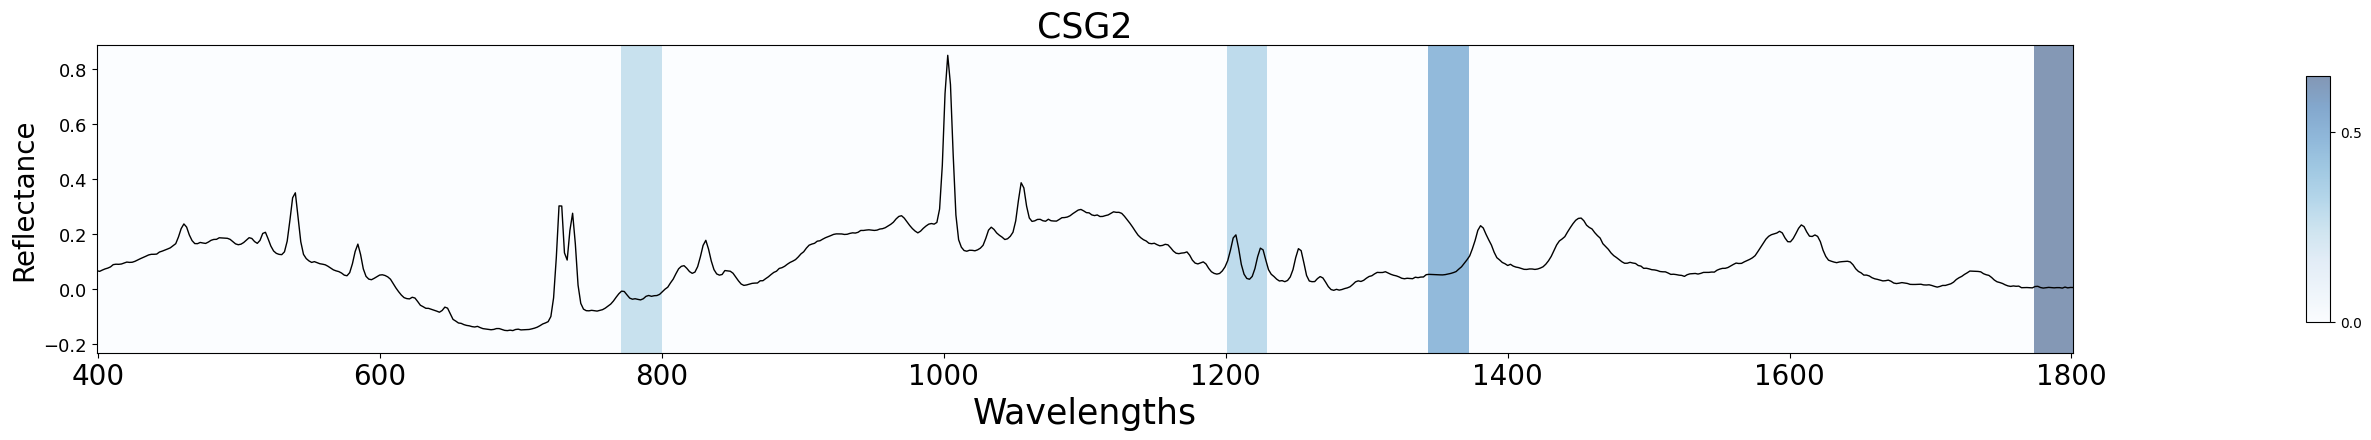

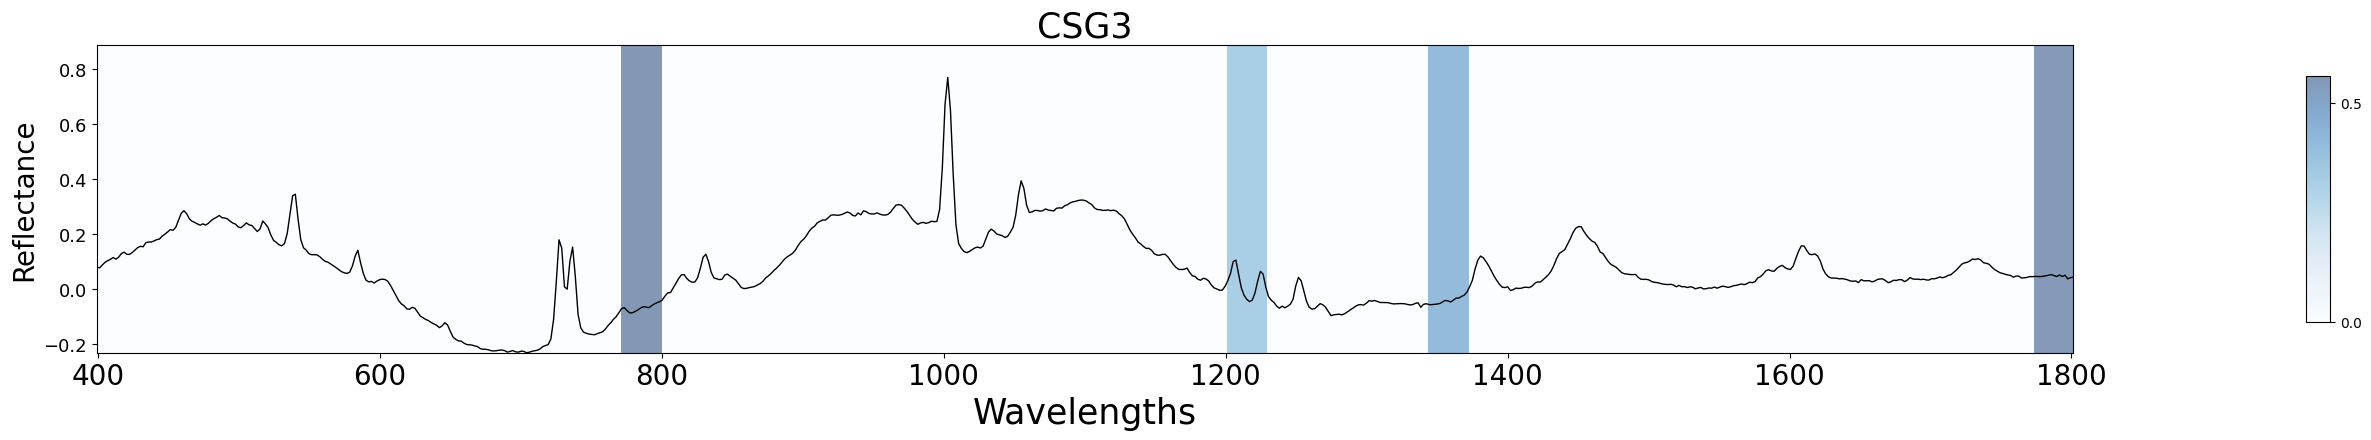

In [ ]:
df_curv = df_curve.drop('outcome', axis = 1)
X_train = train_df.drop('outcome', axis = 1)



fin_heat = {}

full_df_col = [x for x in df_curve.columns]
feat_sel_col = [x for x in X_sel_train.columns]

for key, value in ins.items():
  kv = {}
  for val, col in zip(value, feat_sel_col):
    kv[col] = val
  fin_heat[key] = kv

fin = {}
for key, value in fin_heat.items():
  f = []
  for x in full_df_col:
    if x in value.keys():
      f.append(value[x])
    else:
      f.append(0)
  fin[key] = f

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in fin.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 49))
    binned_heatmapdict[key] = mapped_mean

wave = df_curve.columns
w_names = [float(x) for x in wave[:-1]]


i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 729)
y_pos = 729

scaled_average_i = {}
for key, value in average_i.items():
  mi = min(value)
  ma = max(value)
  di = ma - mi
  scaled_average_i[key] = [x / di for x in value]

cmax = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue
cmin = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue


for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=2),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, scaled_average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  plt.tick_params(axis='y', labelsize=13)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[0, 0.5])
  #cbar.set_label('Gradient Usage', fontsize=12)
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

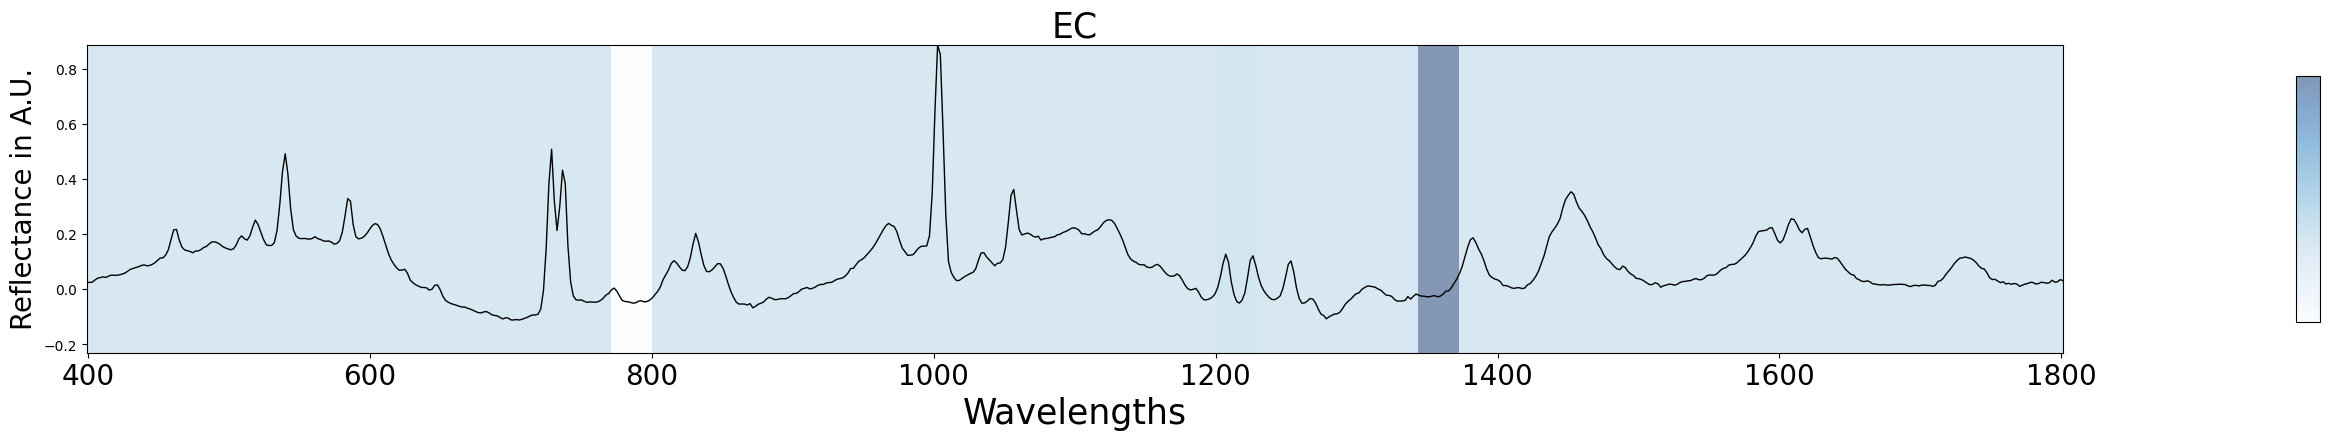

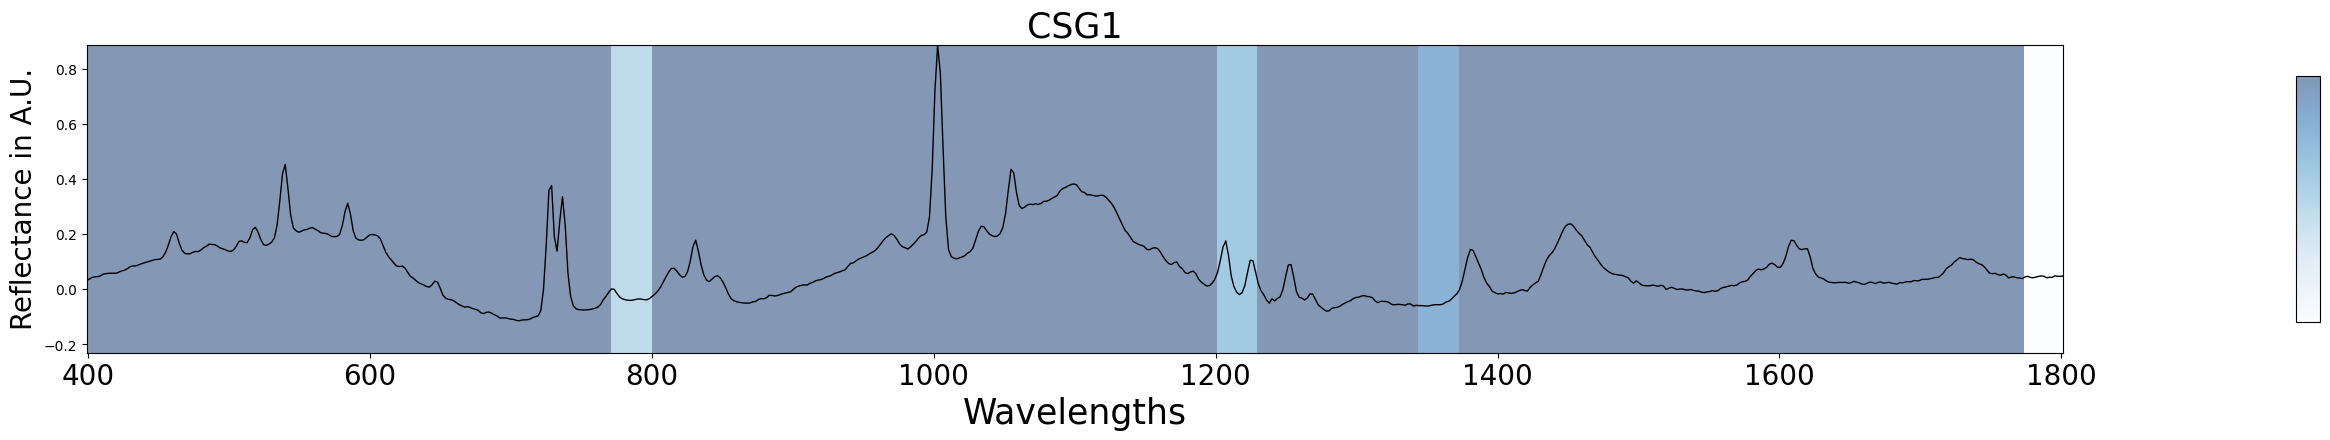

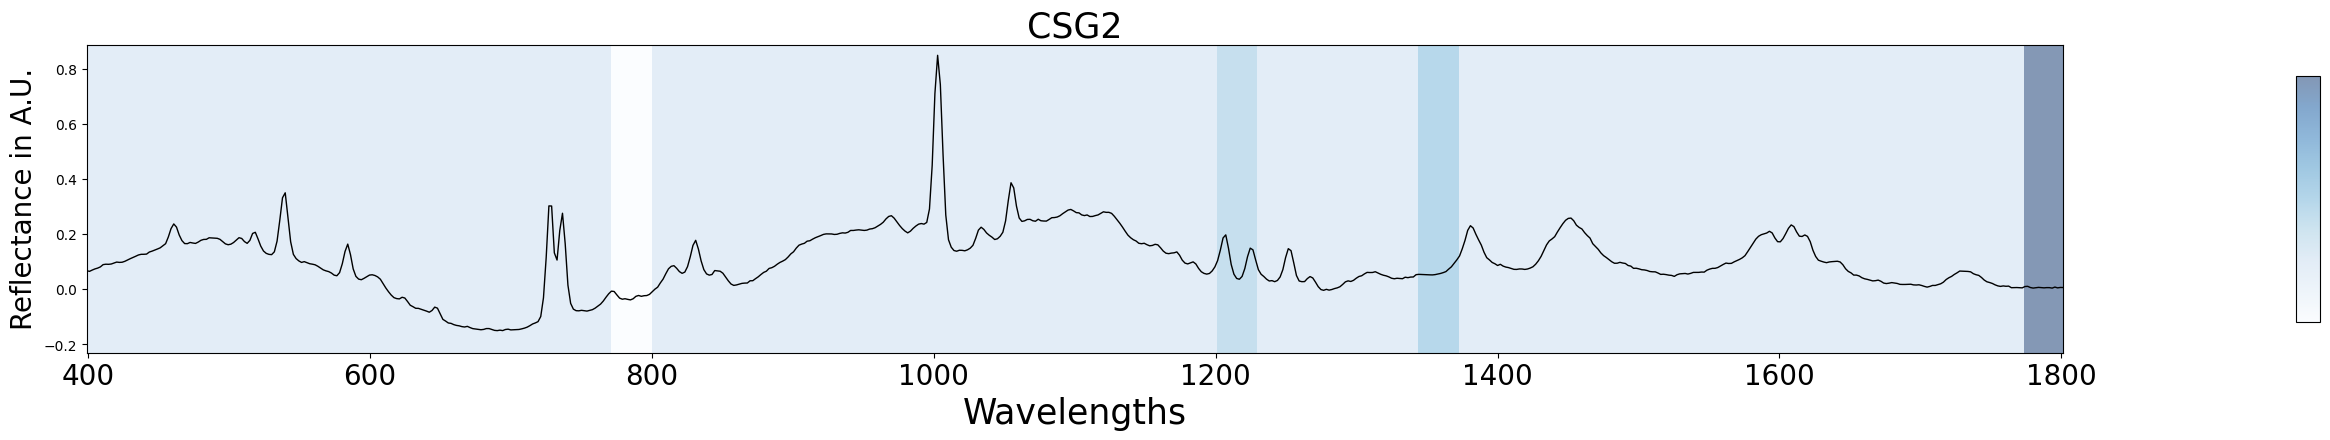

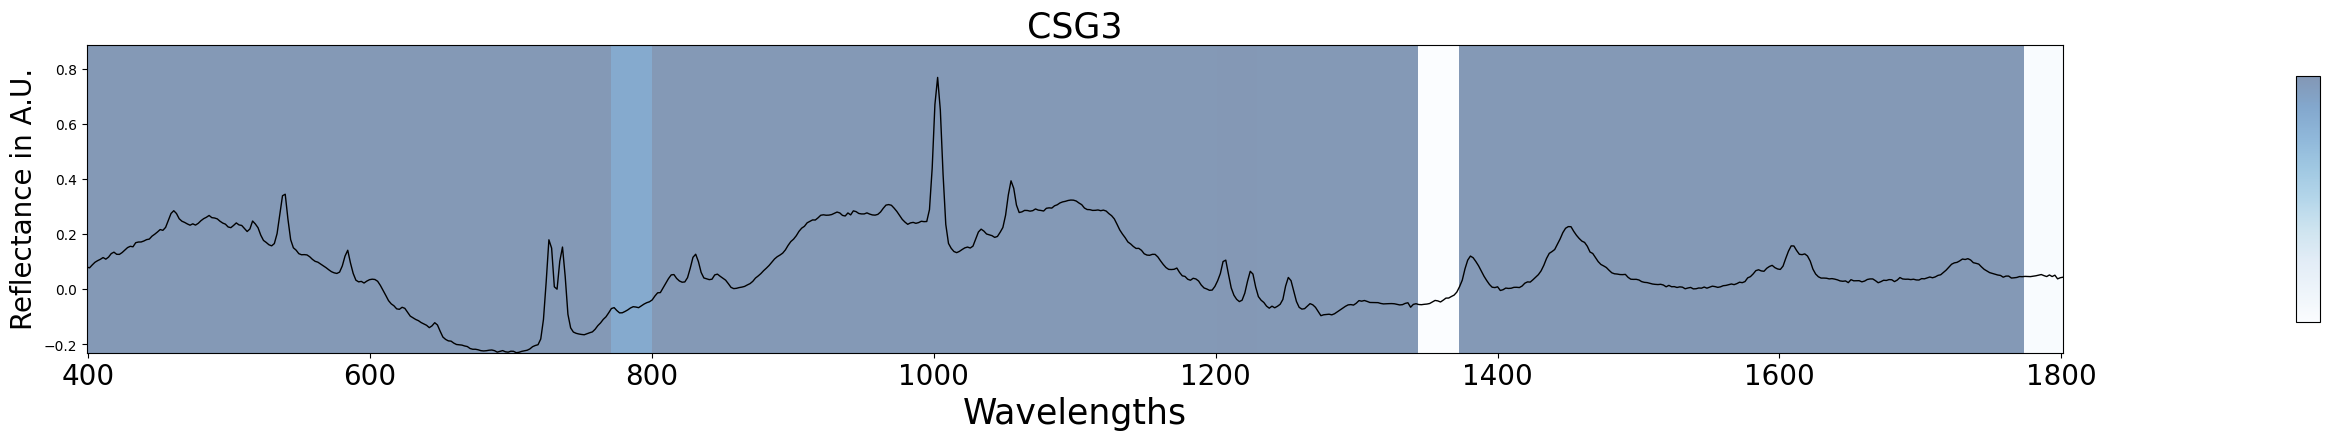

In [ ]:
def plot_ax(ax, signal, sampling_rate, plot_grid=True):
    color_line = (0, 0, 0.7)
    color_major = (1, 0, 0)
    color_minor = (1, 0.7, 0.7)

    ax.plot(np.arange(0, len(signal)), signal, linewidth=0.5, color=color_line)

    if plot_grid:
        # set major grid
        xmajor = np.arange(0, len(signal), sampling_rate * 0.2)
        ymajor = np.arange(signal.min(), signal.max(), 0.5)
        ax.set_xticks(xmajor, minor=False)
        ax.set_xticks(xmajor, minor=False)
        ax.set_yticks(ymajor, minor=False)
        ax.grid(which="major", color=color_major, linewidth=0.5)

        # set minor grid
        xminor = np.arange(0, len(signal), sampling_rate * 0.04)
        yminor = np.arange(signal.min(), signal.max(), 0.1)
        ax.set_xticks(xminor, minor=True)
        ax.set_yticks(yminor, minor=True)
        ax.grid(which="minor", color=color_minor, linewidth=0.5)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.margins(0)

    ax.set_ylim(signal.min(), signal.max())

total_av = np.mean(list(average_heatmap.values()), axis=0)
average_heatmap['total'] = total_av

total_i = np.mean(np.array(list(average_record.values())), axis = 0)
average_record['total'] = total_i

#Gettiing Average Heatmaps
#Setting lower and upper bounds for signal intensity

wave = test_df.columns
w_names = [float(x) for x in wave[:-1]]

X = test_df.drop('outcome', axis = 1)
y = test_df['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728

scaled_average_i = {}
for key, value in average_i.items():
  mi = min(value)
  ma = max(value)
  di = ma - mi
  scaled_average_i[key] = [x / di for x in value]

cmax = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue
cmin = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

gmax = 0
for key, value in average_heatmap.items():
  f = [x for x in value]
  i = max(f)
  if i > gmax:
    gmax = i
  else:
    continue
gmin = 0
for key, value in average_heatmap.items():
  f = [x for x in value]
  i = min(f)
  if i < gmin:
    gmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=2),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, scaled_average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-0.003, 0.003])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

In [ ]:
h = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_average_heatmap_transformer.csv')
m = [x for x in h['total']]


train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


#Retain only features in 99th percentile or above
per = np.percentile(m, 99)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = 8
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train_df.shape[1] - len(l))])

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_train['outcome'] = train_df['outcome']

feat_sel_test = test_df[sel_list]
feat_sel_test['outcome'] = test_df['outcome']

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_Transformer_99.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_Transformer_99.csv')

<ipython-input-41-ce93abee8d00>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_train['outcome'] = train_df['outcome']
<ipython-input-41-ce93abee8d00>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_sel_test['outcome'] = test_df['outcome']


In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_Transformer_99.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_Transformer_99.csv')

#Random Forest

##Implement Model

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
train_df = train_df.replace({"outcome": dic})
test_df = test_df.replace({"outcome": dic})

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

1.0
validation_accuracy: 1.000


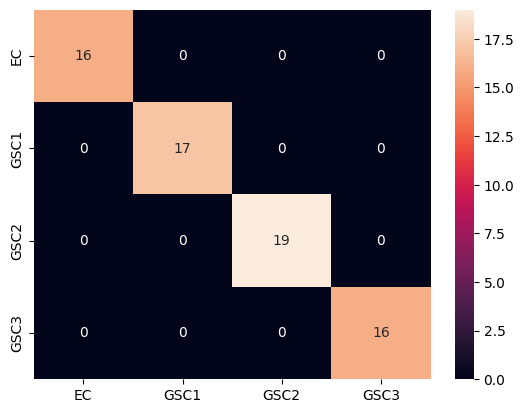

              precision    recall  f1-score   support

        CSG1       1.00      1.00      1.00        16
        CSG2       1.00      1.00      1.00        17
        CSG3       1.00      1.00      1.00        19
          EC       1.00      1.00      1.00        16

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [ ]:
#Random Forest
tree1 = RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')

tree1.fit(X_train, y_train)
pred = tree1.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['EC', 'GSC1', 'GSC2', 'GSC3'], xticklabels=['EC', 'GSC1', 'GSC2', 'GSC3'])
plt.show()

print(classification_report(y_test, pred))

##Explainability

In [ ]:
#Transparency RF
classes = tree1.classes_
coefficients = tree1.feature_importances_

def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X_train, y_train, coefficients)

coef_df = pd.DataFrame(result)
coef_df.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Random_Forrest_Coefficients_Testing.csv')

In [ ]:
heatmap_dict = {}
for key, value in result.items():
  val_list = []
  for key1, value1 in value.items():
    val_list.append(value1)
  heatmap_dict[key] = val_list

In [ ]:
#Feature Selection
cof = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Random_Forrest_Coefficients_Testing.csv', index_col = 0)
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
train_df = train_df.replace({"outcome": dic})
test_df = test_df.replace({"outcome": dic})

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']


X_train_l = []
for index, row in X_train.iterrows():
    X_train_l.append([x for x in row])

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in heatmap_dict.items():
    mapped = [value[x:x+32] for x in range(0, len(value), 32)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean

record_dict = {}
for record, label in zip(X_train_l, y_train):
  if label in record_dict.keys():
    record_dict[label].append(record)
  else:
    record_dict[label] = [record]

agg_rec = {}
for key, value in record_dict.items():
    agg_rec[key] = np.mean(value, axis = 0)


#Create 48 bins for heatmap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

#Record dict is recorded signals
record_dict = {}
l = []
for r, label in zip(X_train_l, y_train):
  l.append(r)
  if label in record_dict.keys():
    record_dict[label].append(r)
  else:
    record_dict[label] = [r]

#Creating mean signal per class
agg_rec = {}
for key, value in record_dict.items():
    agg_rec[key] = np.mean(value, axis = 0)

#Add average record here
tot = np.mean(l, axis = 0)
agg_rec['total'] = tot

#Calculate average heatmap
hea = []
for key, value in heatmap_dict.items():
  hea.append(value)
tot_heat = np.mean(hea, axis = 0)
heatmap_dict['total'] = tot_heat

binned_heatmapdict = {}
for key, value in heatmap_dict.items():
    mapped = [value[x:x+22] for x in range(0, len(value), 22)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean

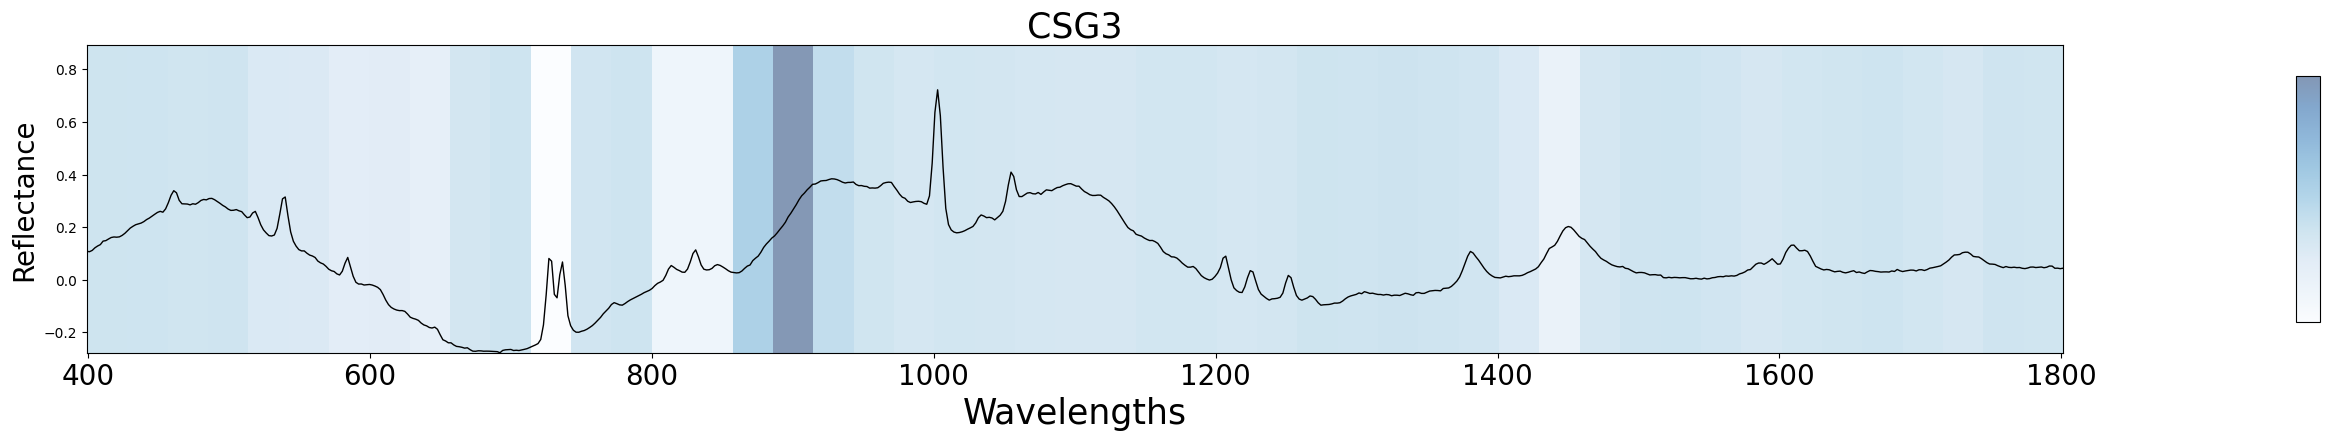

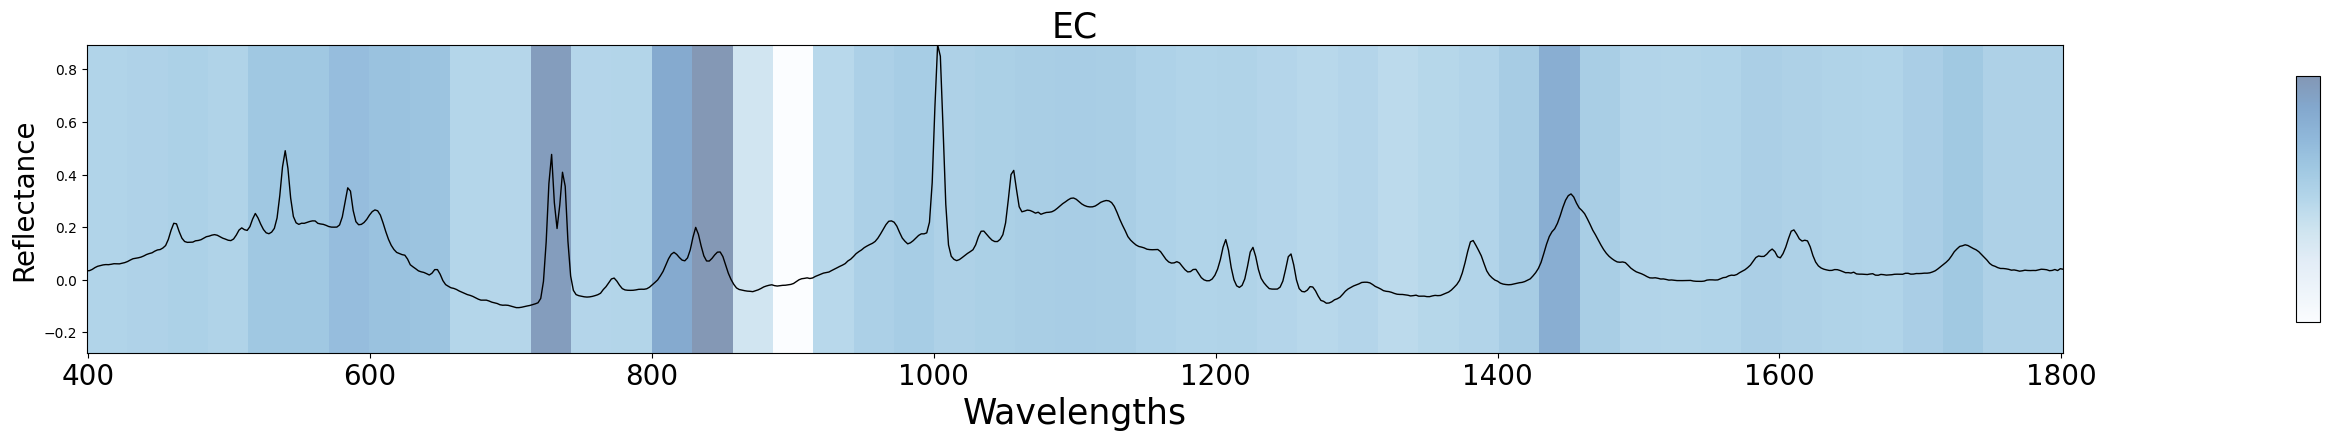

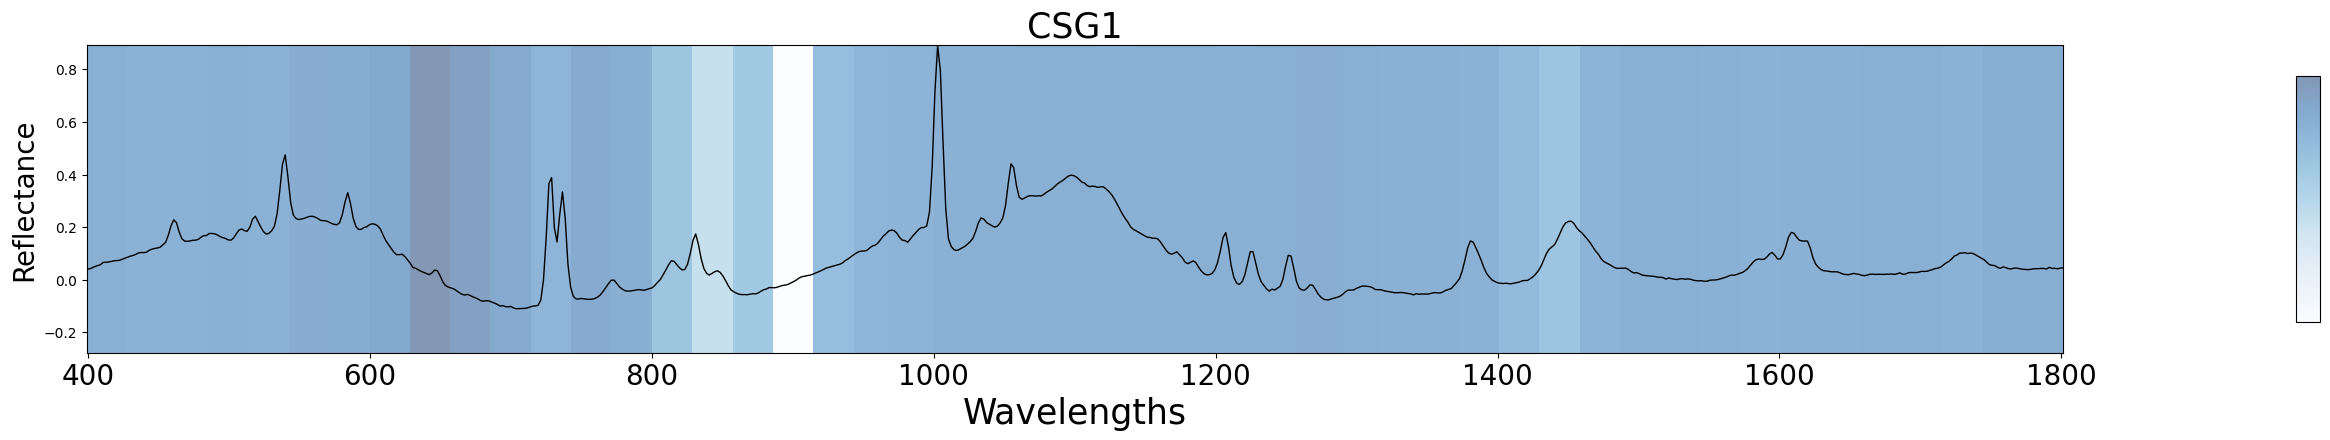

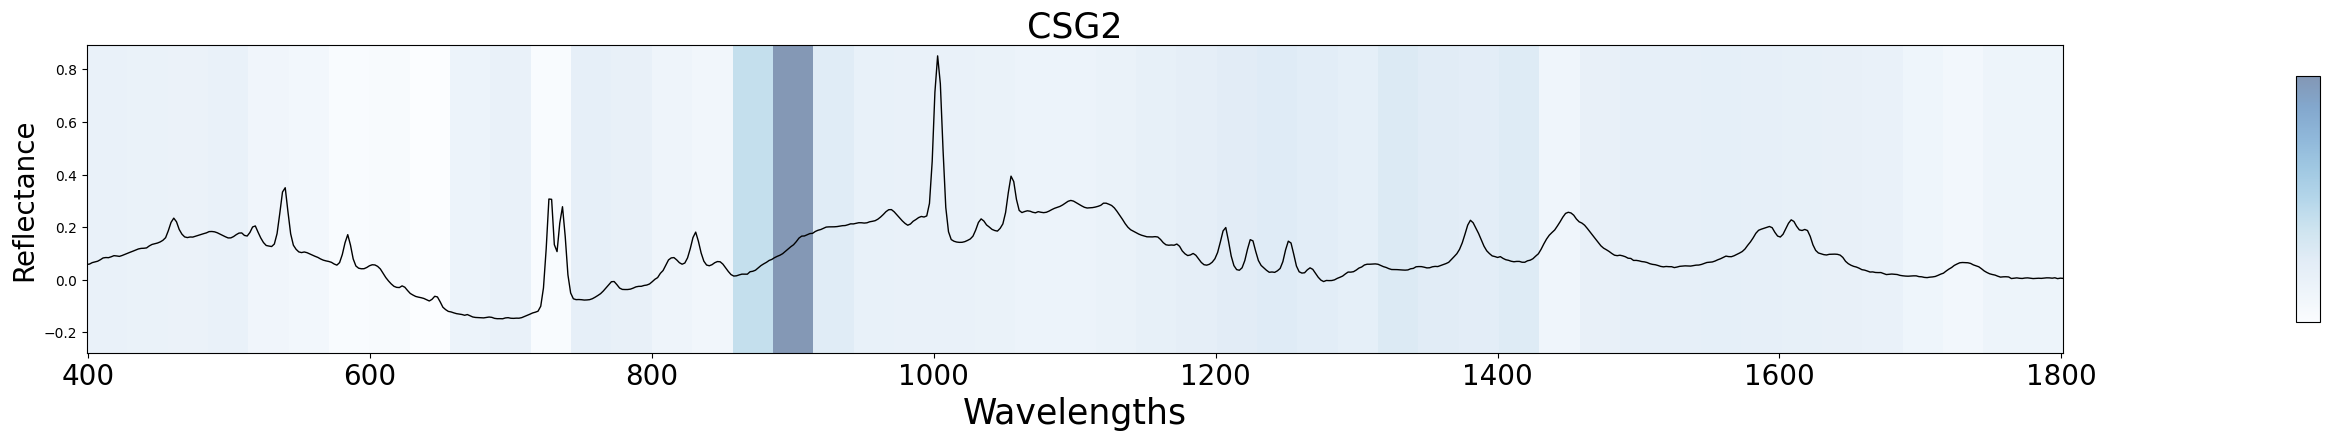

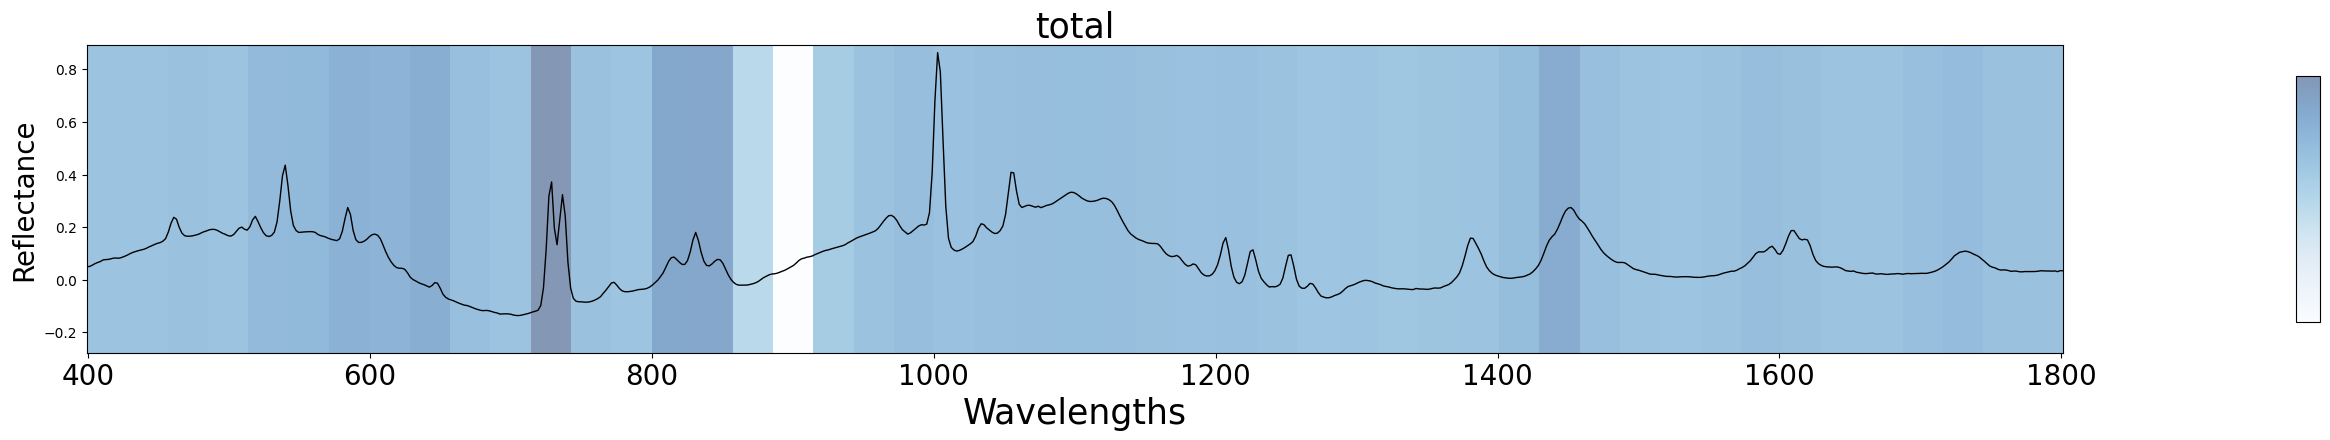

In [ ]:
wave = train_df.columns
w_names = [float(x) for x in wave[:-1]]
binned_heatmapdict = {}
for key, value in heatmap_dict.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean

bars = range(0, 728)
y_pos = 728


#Gettiing Average Heatmaps
#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue
cmin = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

gmax = 0
for key, value in heatmap_dict.items():
  f = [x for x in value]
  i = max(f)
  if i > gmax:
    gmax = i
  else:
    continue
gmin = 0
for key, value in heatmap_dict.items():
  f = [x for x in value]
  i = min(f)
  if i < gmin:
    gmin = i
  else:
    continue

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=0),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, scaled_average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

##Feature Selection

1.0
validation_accuracy: 1.000


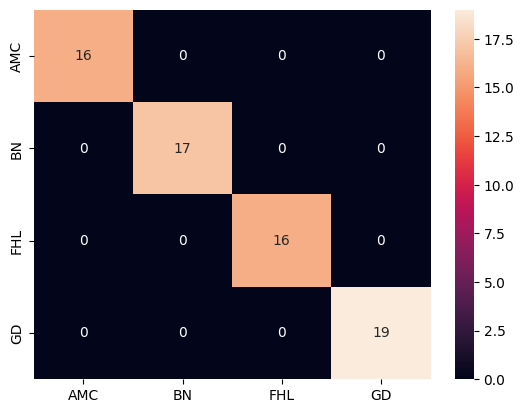

              precision    recall  f1-score   support

         AMC       1.00      1.00      1.00        16
          BN       1.00      1.00      1.00        17
         FHL       1.00      1.00      1.00        16
          GD       1.00      1.00      1.00        19

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [ ]:
#Running RF on RF Wavelengths - 80
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 80th percentile or above
per = np.percentile(m, 80)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue


feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']



#Model Implementation and Tuning for reduced feature space - 80

tree80 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree80.fit(X_sel_train, y_sel_train)
pred = tree80.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_RF_80.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_RF_80.csv')

1.0
validation_accuracy: 1.000


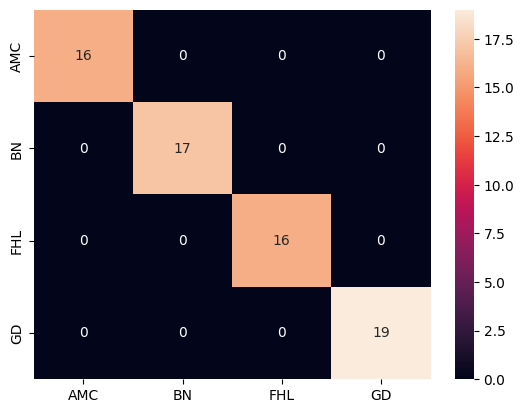

              precision    recall  f1-score   support

         AMC       1.00      1.00      1.00        16
          BN       1.00      1.00      1.00        17
         FHL       1.00      1.00      1.00        16
          GD       1.00      1.00      1.00        19

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [ ]:
#Running RF on RF Wavelengths - 80
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 85th percentile or above
per = np.percentile(m, 85)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue


feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']



#Model Implementation and Tuning for reduced feature space - 80

tree85 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree85.fit(X_sel_train, y_sel_train)
pred = tree85.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_RF_85.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_RF_85.csv')

0.9852941176470589
validation_accuracy: 0.985


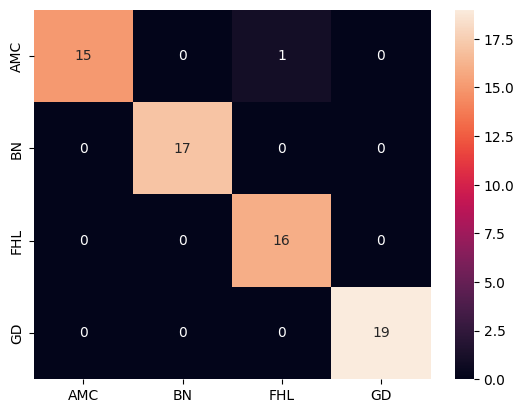

              precision    recall  f1-score   support

         AMC       1.00      0.94      0.97        16
          BN       1.00      1.00      1.00        17
         FHL       0.94      1.00      0.97        16
          GD       1.00      1.00      1.00        19

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68



In [ ]:
#Running RF on RF Wavelengths - 80
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 90th percentile or above
per = np.percentile(m, 90)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue


feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']



#Model Implementation and Tuning for reduced feature space - 80

tree90 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree90.fit(X_sel_train, y_sel_train)
pred = tree90.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_RF_90.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_RF_90.csv')

0.9705882352941176
validation_accuracy: 0.971


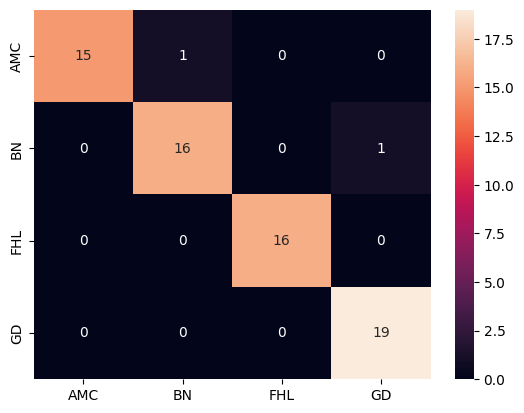

              precision    recall  f1-score   support

         AMC       1.00      0.94      0.97        16
          BN       0.94      0.94      0.94        17
         FHL       1.00      1.00      1.00        16
          GD       0.95      1.00      0.97        19

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



In [ ]:
#Running RF on RF Wavelengths - 80
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 95th percentile or above
per = np.percentile(m, 95)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue


feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']



#Model Implementation and Tuning for reduced feature space - 80

tree95 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree95.fit(X_sel_train, y_sel_train)
pred = tree95.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_RF_95.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_RF_95.csv')

0.9705882352941176
validation_accuracy: 0.971


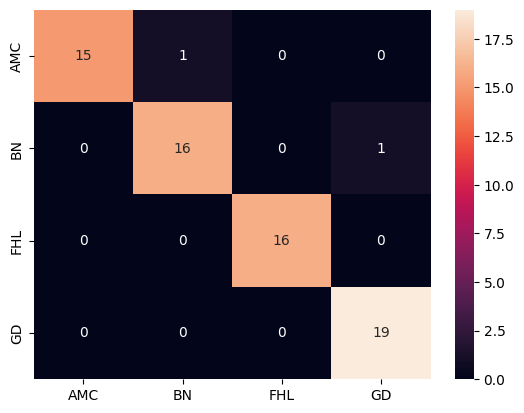

              precision    recall  f1-score   support

         AMC       1.00      0.94      0.97        16
          BN       0.94      0.94      0.94        17
         FHL       1.00      1.00      1.00        16
          GD       0.95      1.00      0.97        19

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



In [ ]:
#Running RF on RF Wavelengths - 80
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 99th percentile or above
per = np.percentile(m, 99)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue


feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']



#Model Implementation and Tuning for reduced feature space - 80

tree99 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree99.fit(X_sel_train, y_sel_train)
pred = tree99.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_RF_99.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_RF_99.csv')

#LDA

##Implement Model

0.9117647058823529
validation_accuracy: 0.912


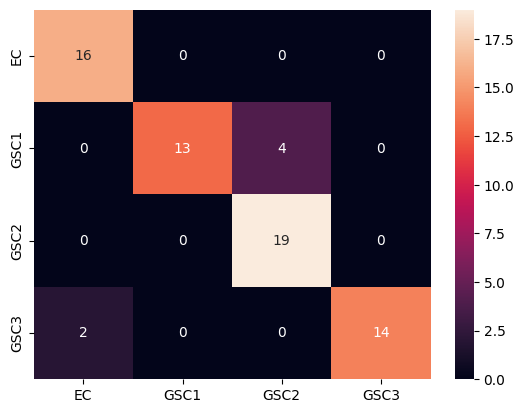

              precision    recall  f1-score   support

        CSG1       0.89      1.00      0.94        16
        CSG2       1.00      0.76      0.87        17
        CSG3       0.83      1.00      0.90        19
          EC       1.00      0.88      0.93        16

    accuracy                           0.91        68
   macro avg       0.93      0.91      0.91        68
weighted avg       0.93      0.91      0.91        68



In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
train_df = train_df.replace({"outcome": dic})
test_df = test_df.replace({"outcome": dic})


#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

LDA = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA.fit(X_train, y_train)
pred = LDA.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['EC', 'GSC1', 'GSC2', 'GSC3'], xticklabels=['EC', 'GSC1', 'GSC2', 'GSC3'])
plt.show()

print(classification_report(y_test, pred))

##Explainability

In [ ]:
#Get order of classes
clas = LDA.classes_
coefficients = LDA.coef_

coef_df = pd.DataFrame(coefficients)
coef_df['classes'] = clas
coef_df.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/LDA_coefficients_test.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/LDA_coefficients_test.csv', index_col = 0)
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

In [ ]:
#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

In [ ]:
X_train_l = []
for index, row in X_train.iterrows():
    X_train_l.append([x for x in row])

#Record per class
clas = df['classes']
record = df.drop('classes', axis = 1)
rec = []
for index, row in record.iterrows():
    rec.append([x for x in row])

heatmap_dict = {}
for a, b in zip(clas, rec):
    heatmap_dict[a] = b

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in heatmap_dict.items():
    mapped = [value[x:x+32] for x in range(0, len(value), 32)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean

record_dict = {}
for record, label in zip(X_train_l, y_train):
  if label in record_dict.keys():
    record_dict[label].append(record)
  else:
    record_dict[label] = [record]

agg_rec = {}
for key, value in record_dict.items():
    agg_rec[key] = np.mean(value, axis = 0)

In [ ]:
#Create 48 bins for heatmap

#Record dict is recorded signals
record_dict = {}
l = []
for r, label in zip(X_train_l, y_train):
  l.append(r)
  if label in record_dict.keys():
    record_dict[label].append(r)
  else:
    record_dict[label] = [r]

#Creating mean signal per class
agg_rec = {}
for key, value in record_dict.items():
    agg_rec[key] = np.mean(value, axis = 0)

#Add average record here
tot = np.mean(l, axis = 0)
agg_rec['total'] = tot

#Calculate average heatmap
hea = []
for key, value in heatmap_dict.items():
  hea.append(value)
tot_heat = np.mean(hea, axis = 0)
heatmap_dict['total'] = tot_heat

binned_heatmapdict = {}
for key, value in heatmap_dict.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean

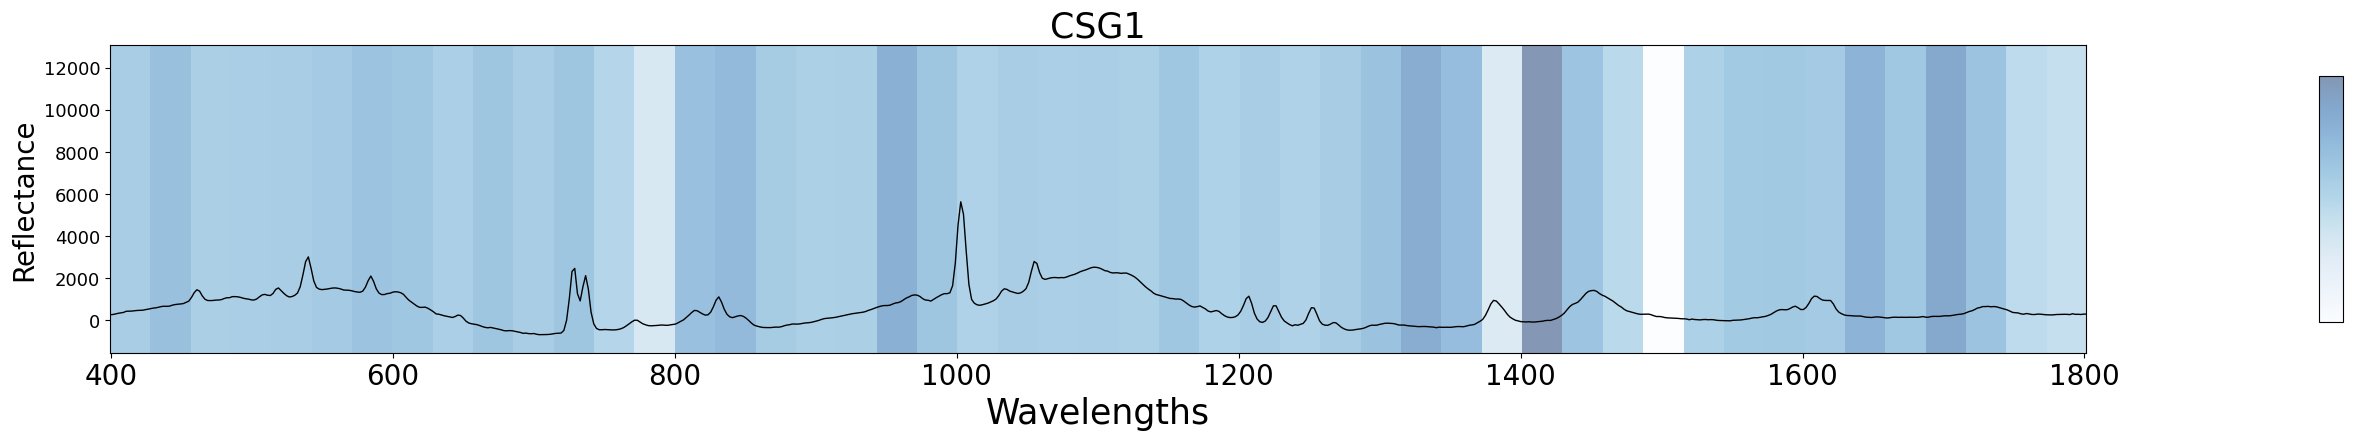

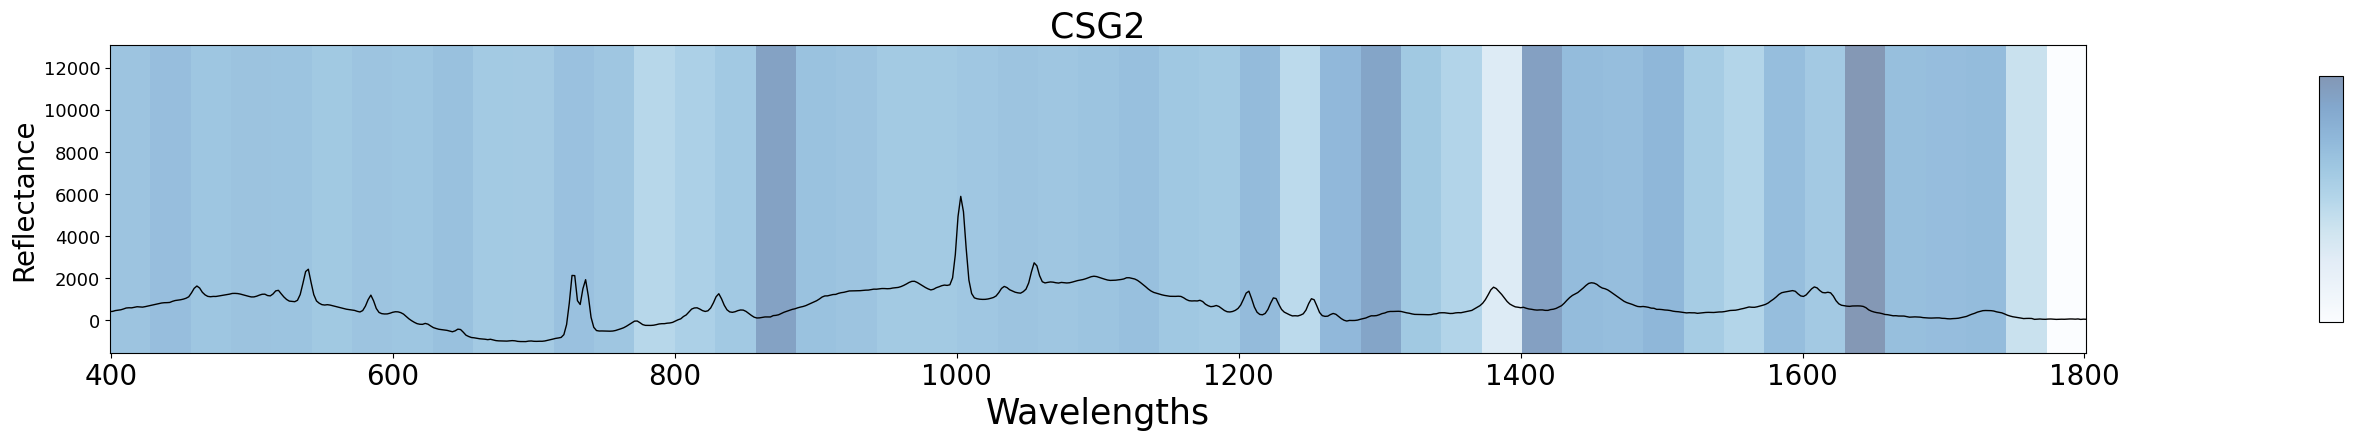

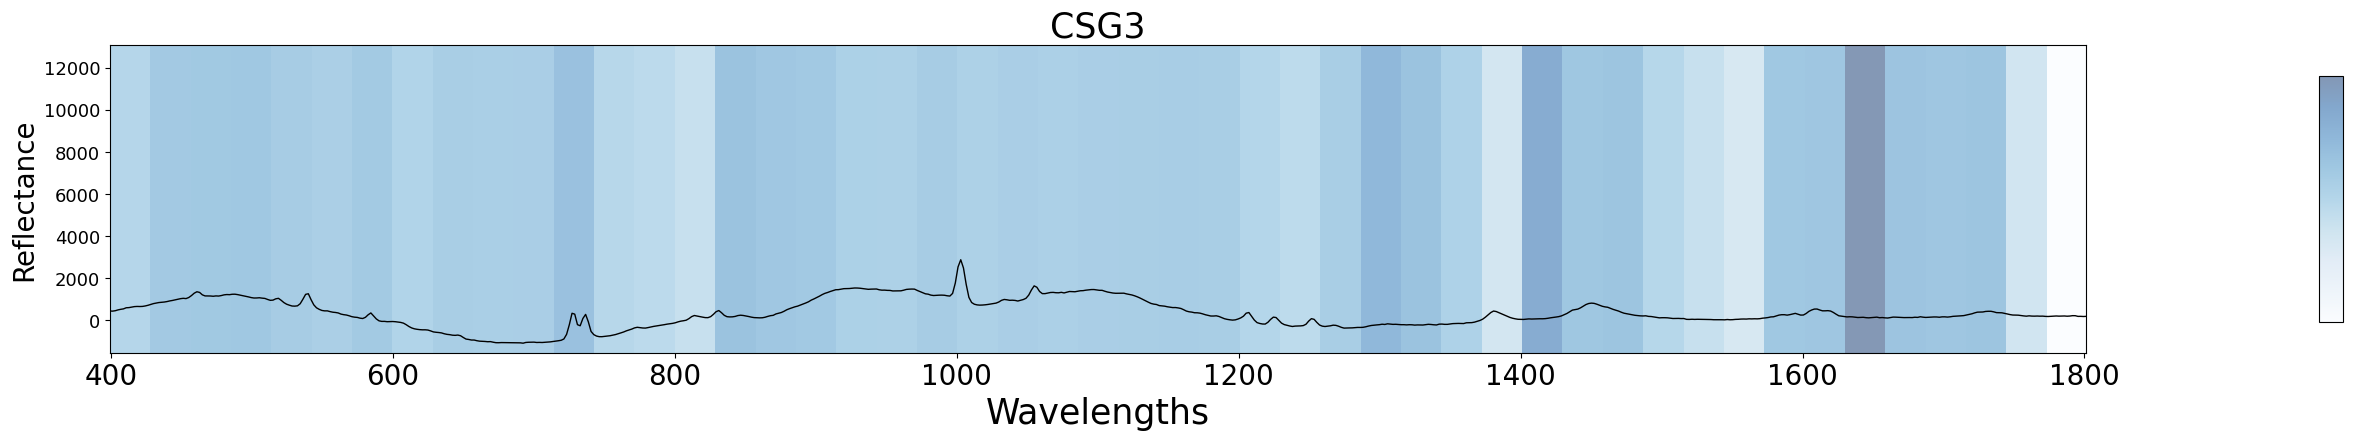

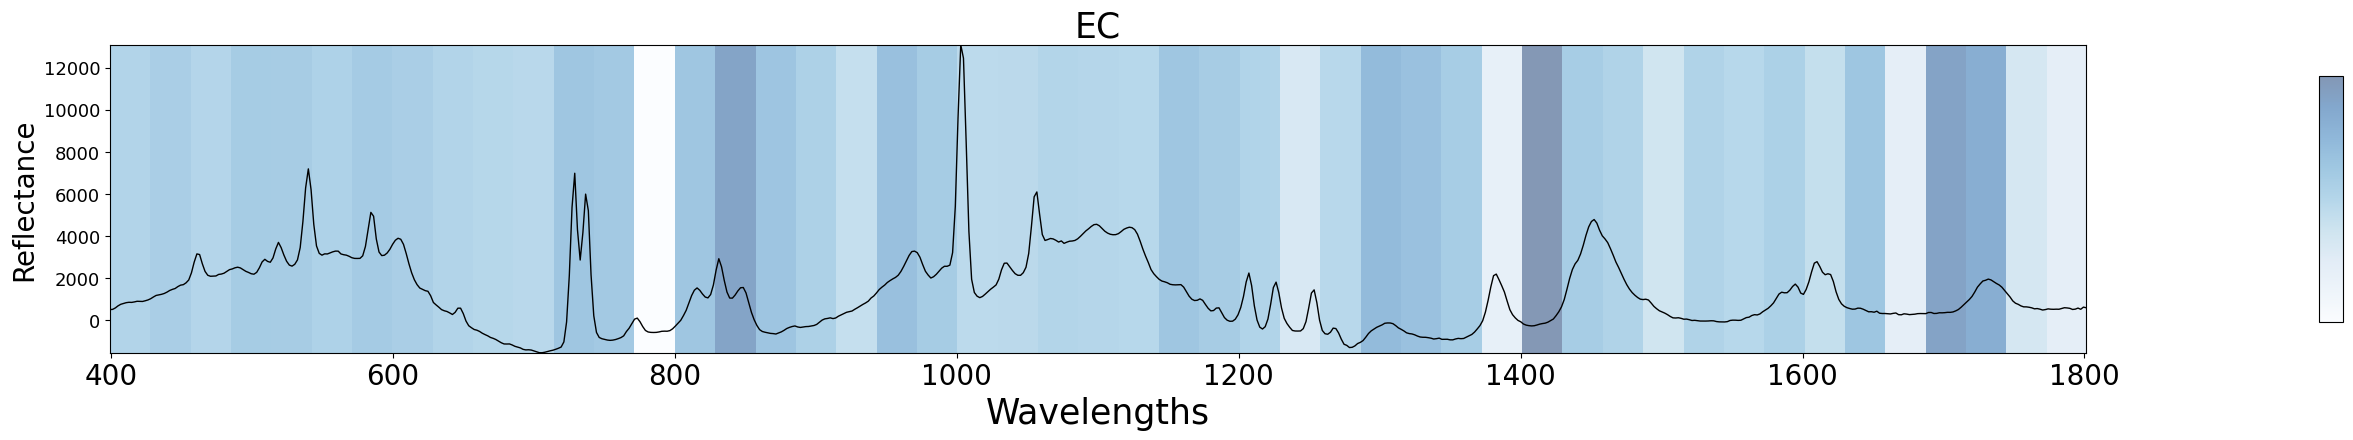

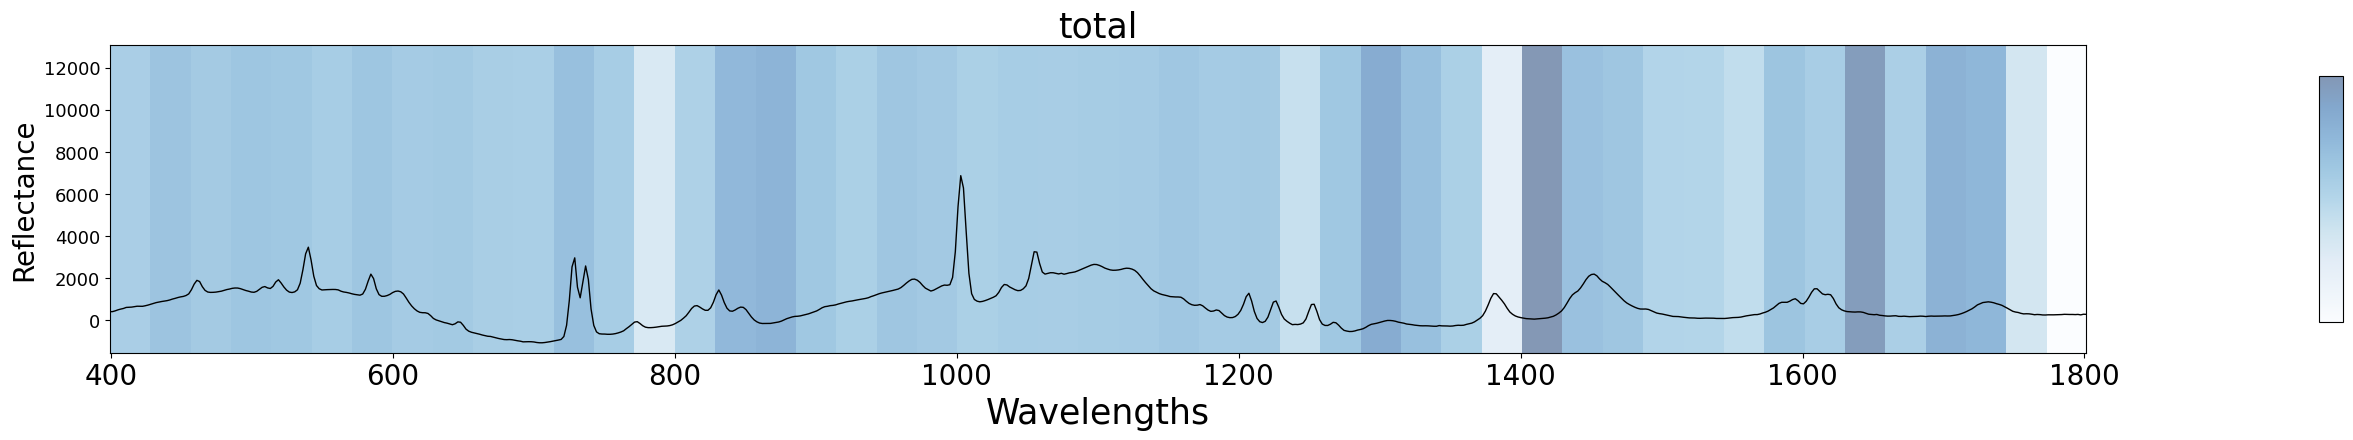

In [ ]:
wave = train_df.columns
w_names = [float(x) for x in wave[:-1]]

cmax = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue
cmin = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

gmax = 0
for key, value in average_heatmap.items():
  f = [x for x in value]
  i = max(f)
  if i > gmax:
    gmax = i
  else:
    continue
gmin = 0
for key, value in average_heatmap.items():
  f = [x for x in value]
  i = min(f)
  if i < gmin:
    gmin = i
  else:
    continue

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=0),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  plt.tick_params(axis='y', labelsize=13)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  #cbar.set_label('Gradient Usage', fontsize=12)
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

##Feature Selection

0.8382352941176471
validation_accuracy: 0.838


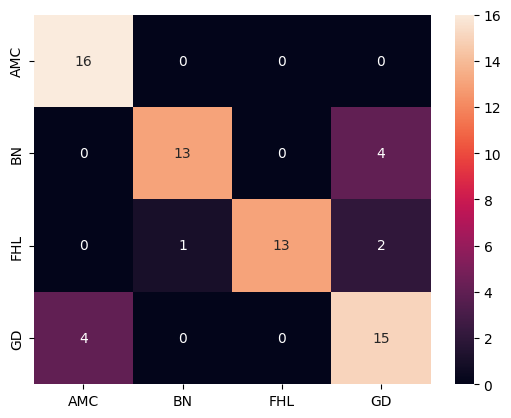

              precision    recall  f1-score   support

         AMC       0.80      1.00      0.89        16
          BN       0.93      0.76      0.84        17
         FHL       1.00      0.81      0.90        16
          GD       0.71      0.79      0.75        19

    accuracy                           0.84        68
   macro avg       0.86      0.84      0.84        68
weighted avg       0.86      0.84      0.84        68



In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 80th percentile or above
per = np.percentile(m, 80)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


#Model Implementation and Tuning for reduced feature space - 80

LDA80 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA80.fit(X_sel_train, y_sel_train)
pred = LDA80.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_LDA_80.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_LDA_80.csv')

0.7941176470588235
validation_accuracy: 0.794


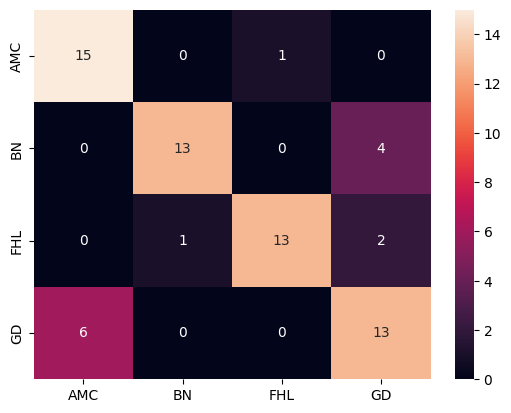

              precision    recall  f1-score   support

         AMC       0.71      0.94      0.81        16
          BN       0.93      0.76      0.84        17
         FHL       0.93      0.81      0.87        16
          GD       0.68      0.68      0.68        19

    accuracy                           0.79        68
   macro avg       0.81      0.80      0.80        68
weighted avg       0.81      0.79      0.80        68



In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 85th percentile or above
per = np.percentile(m, 85)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


#Model Implementation and Tuning for reduced feature space - 80

LDA85 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA85.fit(X_sel_train, y_sel_train)
pred = LDA85.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_LDA_85.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_LDA_85.csv')

0.7941176470588235
validation_accuracy: 0.794


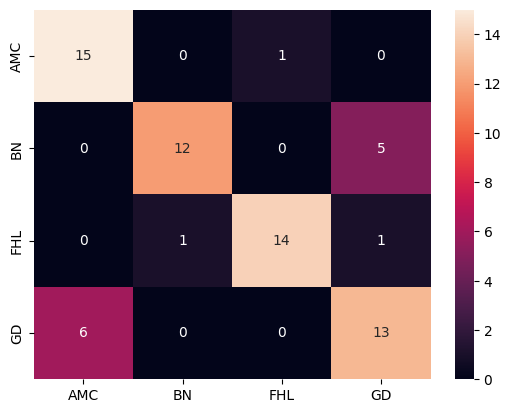

              precision    recall  f1-score   support

         AMC       0.71      0.94      0.81        16
          BN       0.92      0.71      0.80        17
         FHL       0.93      0.88      0.90        16
          GD       0.68      0.68      0.68        19

    accuracy                           0.79        68
   macro avg       0.81      0.80      0.80        68
weighted avg       0.81      0.79      0.79        68



In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 90th percentile or above
per = np.percentile(m, 90)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


#Model Implementation and Tuning for reduced feature space - 80

LDA90 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA90.fit(X_sel_train, y_sel_train)
pred = LDA90.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_LDA_90.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_LDA_90.csv')

0.7058823529411765
validation_accuracy: 0.706


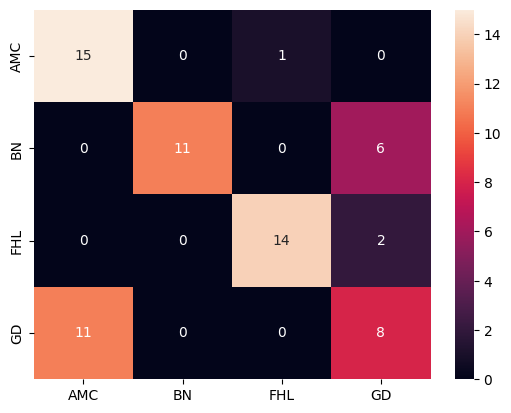

              precision    recall  f1-score   support

         AMC       0.58      0.94      0.71        16
          BN       1.00      0.65      0.79        17
         FHL       0.93      0.88      0.90        16
          GD       0.50      0.42      0.46        19

    accuracy                           0.71        68
   macro avg       0.75      0.72      0.72        68
weighted avg       0.75      0.71      0.70        68



In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 95th percentile or above
per = np.percentile(m, 95)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


#Model Implementation and Tuning for reduced feature space - 80

LDA95 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA95.fit(X_sel_train, y_sel_train)
pred = LDA95.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_LDA_95.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_LDA_95.csv')

0.5147058823529411
validation_accuracy: 0.515


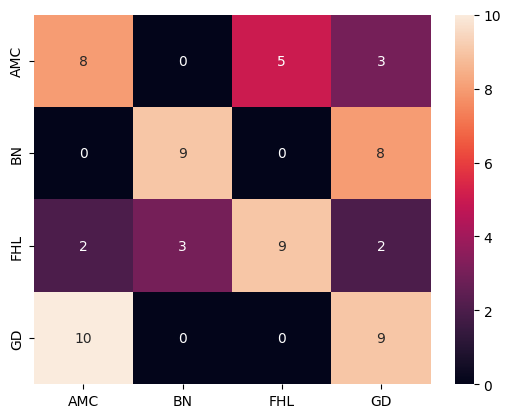

              precision    recall  f1-score   support

         AMC       0.40      0.50      0.44        16
          BN       0.75      0.53      0.62        17
         FHL       0.64      0.56      0.60        16
          GD       0.41      0.47      0.44        19

    accuracy                           0.51        68
   macro avg       0.55      0.52      0.53        68
weighted avg       0.55      0.51      0.52        68



In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

#Create training and validation datasets
X_train = train_df.drop('outcome', axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop('outcome', axis = 1)
y_test = test_df['outcome']

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 99th percentile or above
per = np.percentile(m, 99)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train_df.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

feat_sel_train = train_df[sel_list]
feat_sel_test = test_df[sel_list]

X_sel_train = feat_sel_train.drop('outcome', axis = 1)
y_sel_train = feat_sel_train['outcome']

X_sel_test = feat_sel_test.drop('outcome', axis = 1)
y_sel_test = feat_sel_test['outcome']


#Model Implementation and Tuning for reduced feature space - 80

LDA99 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA99.fit(X_sel_train, y_sel_train)
pred = LDA99.predict(X_sel_test)
final_accuracy = accuracy_score(y_sel_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sel_test, pred)
acc = accuracy_score(y_sel_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_sel_test, pred))

In [ ]:
X_s_t = X_sel_train
X_s_t['outcome'] = y_sel_train

X_s_te = X_sel_test
X_s_te['outcome'] = y_sel_test

X_s_t.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_LDA_99.csv')
X_s_te.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_LDA_99.csv')